EDA-PI Criptomonedas. El objetivo del proyecto es hacer un análisis del mercado de las criptomonedas, para determinar si conviene o no invertir en ellas, y en cuáles, en el año 2023, para obtener rendimientos mayores a inversiones más conservadoras. La recomendación final está dirigia a un público que cuenta con una cartera de riesgo intermedia (ni muy conservadora, ni muy arriesgada), en donde deja un 25% de margen de su portafolio para invertir en alternativas de inversión consideradas de riesgo, como las criptomonedas.

In [163]:
#Librerías utilizadas
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from functools import reduce
from IPython.display import Image
from PIL import Image as PILImage
from io import BytesIO



Utilizamos la API de CoinGecko para obtener datos de mercado de criptomonedas. Luego, procedemos a determinar el TOP 10 de criptomonedas de las más de 4000 existentes, con las que vamos a trabajar para realizar la recomendación de inversión propuesta.

In [23]:

api_url = 'https://api.coingecko.com/api/v3/coins/markets'

# Parámetros de la solicitud
params = {
    'vs_currency': 'usd',  # Moneda base (USD)
    'order': 'market_cap_desc',  # Ordenar por capitalización de mercado descendente
    'per_page': 10,  # Número de resultados por página
    'page': 1  # Página de resultados
}

# Realizar la solicitud HTTP a la API
response = requests.get(api_url, params=params)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Convertir la respuesta JSON en una lista de diccionarios
    data = response.json()

    # Crear un DataFrame de Pandas a partir de la lista de diccionarios
    df = pd.DataFrame(data)
    # Ahora puedes usar df para realizar análisis en los datos
    print(df.head())

    # Crear una lista con los IDs de las 10 primeras criptomonedas
    top_coins_id = [coin['id'] for coin in data]

    # Imprimir la lista de IDs
    print(top_coins_id)
else:
    print('Error al obtener los datos de la API')


            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3  binancecoin    bnb       BNB   
4       ripple    xrp       XRP   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   26103.000000   
1  https://assets.coingecko.com/coins/images/279/...    1653.230000   
2  https://assets.coingecko.com/coins/images/325/...       0.999754   
3  https://assets.coingecko.com/coins/images/825/...     217.510000   
4  https://assets.coingecko.com/coins/images/44/l...       0.519620   

     market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  508710751141                1             548693187619    8561963465   
1  198953423090                2             198953423090    4002062506   
2   82827967271                3              82827967271   14313840466   
3   33491634912                4              43536296614     

In [24]:
df.info() #observamos los campos que vamos a utilizar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10 non-null     object 
 1   symbol                            10 non-null     object 
 2   name                              10 non-null     object 
 3   image                             10 non-null     object 
 4   current_price                     10 non-null     float64
 5   market_cap                        10 non-null     int64  
 6   market_cap_rank                   10 non-null     int64  
 7   fully_diluted_valuation           10 non-null     int64  
 8   total_volume                      10 non-null     int64  
 9   high_24h                          10 non-null     float64
 10  low_24h                           10 non-null     float64
 11  price_change_24h                  10 non-null     float64
 12  price_chang

Realiamos un paneo general de los campos para ver cuáles podríamos utilizar en esta etapa. El dataset de CoinGecko de markets, contiene datos de capitalización, de precio, entre otros, con lo que podems extraer las 10 criptomonedas por mayo capitalización de mercado. De un análisis rápido también se puede observar que las cripto de mayor capitalziación son las de mayor precio. Realizamos limpieza, buscamos nulos, duplicados, estudiamos algunos campos,etc, y observamos que las bases están bastante limpias para trabajar.

In [25]:
df.head(10) # ordenamos por capitalización de mercado

id symbol               name  \
0       bitcoin    btc            Bitcoin   
1      ethereum    eth           Ethereum   
2        tether   usdt             Tether   
3   binancecoin    bnb                BNB   
4        ripple    xrp                XRP   
5      usd-coin   usdc           USD Coin   
6  staked-ether  steth  Lido Staked Ether   
7       cardano    ada            Cardano   
8      dogecoin   doge           Dogecoin   
9        solana    sol             Solana   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   26103.000000   
1  https://assets.coingecko.com/coins/images/279/...    1653.230000   
2  https://assets.coingecko.com/coins/images/325/...       0.999754   
3  https://assets.coingecko.com/coins/images/825/...     217.510000   
4  https://assets.coingecko.com/coins/images/44/l...       0.519620   
5  https://assets.coingecko.com/coins/images/6319...       0.999962   
6  https://assets.coingecko.com/coins/images/1344...    1651.940000   
7  https://assets.coingecko.com/coins/images/975/...       0.262394   
8  https://assets.coingecko.com/coins/images/5/la...       0.062730   
9  https://assets.coingecko.com/coins/images/4128...      20.560000   

     market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  508710751141                1             548693187619    8561963465   
1  198953423090                2             198953423090    4002062506   
2   82827967271                3              82827967271   14313840466   
3   33491634912                4              43536296614     270404955   
4   27526496928                5              52021008127     733730630   
5   25993087817                6              26002596396    2583947467   
6   13889754486                7              13889754486      11072287   
7    9208468842                8              11824250295     139863383   
8    8844314472                9               8844298766     185557883   
9    8412155047               10              11462915008     212023538   

       high_24h  ...  total_supply    max_supply           ath  \
0  26203.000000  ...  2.100000e+07  2.100000e+07  69045.000000   
1   1658.800000  ...  1.202178e+08           NaN   4878.260000   
2      1.000000  ...  8.285160e+10           NaN      1.320000   
3    219.380000  ...  1.538562e+08  2.000000e+08    686.310000   
4      0.529376  ...  9.998849e+10  1.000000e+11      3.400000   
5      1.003000  ...  2.598883e+10           NaN      1.170000   
6   1657.830000  ...  8.396022e+06  8.396022e+06   4829.570000   
7      0.265013  ...  4.500000e+10  4.500000e+10      3.090000   
8      0.063465  ...  1.407749e+11           NaN      0.731578   
9     20.870000  ...  5.559947e+08           NaN    259.960000   

   ath_change_percentage                  ath_date         atl  \
0              -62.16573  2021-11-10T14:24:11.849Z   67.810000   
1              -66.07900  2021-11-10T14:24:19.604Z    0.432979   
2              -24.44121  2018-07-24T00:00:00.000Z    0.572521   
3              -68.28744  2021-05-10T07:24:17.097Z    0.039818   
4              -84.70571  2018-01-07T00:00:00.000Z    0.002686   
5              -14.68285  2019-05-08T00:40:28.300Z    0.877647   
6              -65.74590  2021-11-10T14:40:47.256Z  482.900000   
7              -91.48947  2021-09-02T06:00:10.474Z    0.019253   
8              -91.41091  2021-05-08T05:08:23.458Z    0.000087   
9              -92.07006  2021-11-06T21:54:35.825Z    0.500801   

   atl_change_percentage                  atl_date  \
0            38423.77612  2013-07-06T00:00:00.000Z   
1           382079.12687  2015-10-20T00:00:00.000Z   
2               74.61626  2015-03-02T00:00:00.000Z   
3           546504.70497  2017-10-19T00:00:00.000Z   
4            19249.54262  2014-05-22T00:00:00.000Z   
5               14.00026  2023-03-11T08:02:13.981Z   
6              242.58420  2020-12-22T04:08:21.854Z   
7             1264.5447

In [26]:
df.describe()


current_price    market_cap  market_cap_rank  fully_diluted_valuation  \
count      10.000000  1.000000e+01         10.00000             1.000000e+01   
mean     2964.908446  9.178581e+10          5.50000             9.980557e+10   
std      8157.951805  1.577498e+11          3.02765             1.679007e+11   
min         0.062730  8.412155e+09          1.00000             8.844299e+09   
25%         0.639653  1.037879e+10          3.25000             1.234063e+10   
50%        10.779981  2.675979e+10          5.50000             3.476945e+10   
75%      1293.332500  7.049388e+10          7.75000             7.512623e+10   
max     26103.000000  5.087108e+11         10.00000             5.486932e+11   

       total_volume      high_24h       low_24h  price_change_24h  \
count  1.000000e+01     10.000000     10.000000         10.000000   
mean   3.101447e+09   2976.274085   2938.939929          4.059101   
std    4.777347e+09   8189.177940   8090.374376         10.940445   
min    1.107229e+07      0.063465      0.062157         -0.109835   
25%    1.921743e+08      0.647032      0.633596         -0.001043   
50%    5.020678e+08     10.936500     10.579268         -0.000154   
75%    3.647534e+09   1298.217500   1278.097500          2.012767   
max    1.431384e+10  26203.000000  25886.000000         35.050000   

       price_change_percentage_24h  market_cap_change_24h  \
count                    10.000000           1.000000e+01   
mean                     -0.264303           1.479348e+08   
std                       0.567548           4.626776e+08   
min                      -1.555420          -3.898260e+08   
25%                      -0.515515          -2.412294e+07   
50%                      -0.015445          -1.483437e+07   
75%                       0.147570           9.276003e+07   
max                       0.240140           1.297867e+09   

       market_cap_change_percentage_24h  circulating_supply  total_supply  \
count                         10.000000        1.000000e+01  1.000000e+01   
mean                          -0.118535        3.382752e+10  3.954632e+10   
std                            0.525125        4.707229e+10  5.136070e+10   
min                           -1.396410        8.396022e+06  8.396022e+06   
25%                           -0.213405        1.286274e+08  1.286274e+08   
50%                           -0.058180        1.319367e+10  1.327241e+10   
75%                            0.268073        4.844690e+10  7.338870e+10   
max                            0.326990        1.407751e+11  1.407749e+11   

         max_supply           ath  ath_change_percentage         atl  \
count  5.000000e+00     10.000000              10.000000   10.000000   
mean   2.904588e+10   7970.881158             -66.107828   55.315579   
std    4.417784e+10  21549.744399              27.295605  151.728563   
min    8.396022e+06      0.731578             -92.070060    0.000087   
25%    2.100000e+07      1.762500             -89.734610    0.024394   
50%    2.000000e+08    131.680000             -67.183220    0.466890   
75%    4.500000e+10   3793.755000             -63.060773    0.801365   
max    1.000000e+11  69045.000000             -14.682850  482.900000   

       atl_change_percentage  
count              10.000000  
mean           106407.435681  
std            193937.199354  
min                14.000260  
25%               498.074343  
50%             11632.934045  
75%             63759.795482  
max            546504.704970

In [27]:
df.isnull().sum()

id                                  0
symbol                              0
name                                0
image                               0
current_price                       0
market_cap                          0
market_cap_rank                     0
fully_diluted_valuation             0
total_volume                        0
high_24h                            0
low_24h                             0
price_change_24h                    0
price_change_percentage_24h         0
market_cap_change_24h               0
market_cap_change_percentage_24h    0
circulating_supply                  0
total_supply                        0
max_supply                          5
ath                                 0
ath_change_percentage               0
ath_date                            0
atl                                 0
atl_change_percentage               0
atl_date                            0
roi                                 9
last_updated                        0
dtype: int64

In [28]:
df.duplicated(subset=["current_price"]).sum()

0

In [29]:
df["fully_diluted_valuation"].head(10)

0    548693187619
1    198953423090
2     82827967271
3     43536296614
4     52021008127
5     26002596396
6     13889754486
7     11824250295
8      8844298766
9     11462915008
Name: fully_diluted_valuation, dtype: int64

Removemos las columnas que consideramos que no vamos a utilizar y dejamos el dataframe del mercado global de criptomonedas ordenado por capitalziación de mercado.

In [30]:

columns_to_remove = [3, 6, 9,10,11,12,13,14,  19, 20, 22,23, 25]  # Índices de las columnas a eliminar

# Eliminar las columnas usando el método drop con axis=1
df = df.drop(df.columns[columns_to_remove], axis=1)

# Ahora df solo contendrá las columnas restantes


In [31]:
df.info()  #df mercado global x capitalizacion de mercado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10 non-null     object 
 1   symbol                   10 non-null     object 
 2   name                     10 non-null     object 
 3   current_price            10 non-null     float64
 4   market_cap               10 non-null     int64  
 5   fully_diluted_valuation  10 non-null     int64  
 6   total_volume             10 non-null     int64  
 7   circulating_supply       10 non-null     float64
 8   total_supply             10 non-null     float64
 9   max_supply               5 non-null      float64
 10  ath                      10 non-null     float64
 11  atl                      10 non-null     float64
 12  roi                      1 non-null      object 
dtypes: float64(6), int64(3), object(4)
memory usage: 1.1+ KB


In [32]:
# Exportar el DataFrame a un archivo CSV
nombre_archivo = "df_markets_mark_cap.csv"
df.to_csv(nombre_archivo, index=False)

In [33]:
df

id symbol               name  current_price    market_cap  \
0       bitcoin    btc            Bitcoin   26103.000000  508710751141   
1      ethereum    eth           Ethereum    1653.230000  198953423090   
2        tether   usdt             Tether       0.999754   82827967271   
3   binancecoin    bnb                BNB     217.510000   33491634912   
4        ripple    xrp                XRP       0.519620   27526496928   
5      usd-coin   usdc           USD Coin       0.999962   25993087817   
6  staked-ether  steth  Lido Staked Ether    1651.940000   13889754486   
7       cardano    ada            Cardano       0.262394    9208468842   
8      dogecoin   doge           Dogecoin       0.062730    8844314472   
9        solana    sol             Solana      20.560000    8412155047   

   fully_diluted_valuation  total_volume  circulating_supply  total_supply  \
0             548693187619    8561963465        1.946976e+07  2.100000e+07   
1             198953423090    4002062506        1.202178e+08  1.202178e+08   
2              82827967271   14313840466        8.285160e+10  8.285160e+10   
3              43536296614     270404955        1.538562e+08  1.538562e+08   
4              52021008127     733730630        5.291419e+10  9.998849e+10   
5              26002596396    2583947467        2.597933e+10  2.598883e+10   
6              13889754486      11072287        8.396022e+06  8.396022e+06   
7              11824250295     139863383        3.504502e+10  4.500000e+10   
8               8844298766     185557883        1.407751e+11  1.407749e+11   
9              11462915008     212023538        4.080213e+08  5.559947e+08   

     max_supply           ath         atl  \
0  2.100000e+07  69045.000000   67.810000   
1           NaN   4878.260000    0.432979   
2           NaN      1.320000    0.572521   
3  2.000000e+08    686.310000    0.039818   
4  1.000000e+11      3.400000    0.002686   
5           NaN      1.170000    0.877647   
6  8.396022e+06   4829.570000  482.900000   
7  4.500000e+10      3.090000    0.019253   
8           NaN      0.731578    0.000087   
9           NaN    259.960000    0.500801   

                                                 roi  
0                                               None  
1  {'times': 83.67842647159794, 'currency': 'btc'...  
2                                               None  
3                                               None  
4                                               None  
5                                               None  
6                                               None  
7                                               None  
8                                               None  
9                                               None

In [34]:

#df global x precio más alto
df_precios = df.sort_values(by='current_price', ascending=False)




In [35]:
df_precios.head(10)#Aqui vemos que ordenando por precio más alto, prácticamente son las mismas criptomonedas TOP 10 de capitlización de mercado

id symbol               name  current_price    market_cap  \
0       bitcoin    btc            Bitcoin   26103.000000  508710751141   
1      ethereum    eth           Ethereum    1653.230000  198953423090   
6  staked-ether  steth  Lido Staked Ether    1651.940000   13889754486   
3   binancecoin    bnb                BNB     217.510000   33491634912   
9        solana    sol             Solana      20.560000    8412155047   
5      usd-coin   usdc           USD Coin       0.999962   25993087817   
2        tether   usdt             Tether       0.999754   82827967271   
4        ripple    xrp                XRP       0.519620   27526496928   
7       cardano    ada            Cardano       0.262394    9208468842   
8      dogecoin   doge           Dogecoin       0.062730    8844314472   

   fully_diluted_valuation  total_volume  circulating_supply  total_supply  \
0             548693187619    8561963465        1.946976e+07  2.100000e+07   
1             198953423090    4002062506        1.202178e+08  1.202178e+08   
6              13889754486      11072287        8.396022e+06  8.396022e+06   
3              43536296614     270404955        1.538562e+08  1.538562e+08   
9              11462915008     212023538        4.080213e+08  5.559947e+08   
5              26002596396    2583947467        2.597933e+10  2.598883e+10   
2              82827967271   14313840466        8.285160e+10  8.285160e+10   
4              52021008127     733730630        5.291419e+10  9.998849e+10   
7              11824250295     139863383        3.504502e+10  4.500000e+10   
8               8844298766     185557883        1.407751e+11  1.407749e+11   

     max_supply           ath         atl  \
0  2.100000e+07  69045.000000   67.810000   
1           NaN   4878.260000    0.432979   
6  8.396022e+06   4829.570000  482.900000   
3  2.000000e+08    686.310000    0.039818   
9           NaN    259.960000    0.500801   
5           NaN      1.170000    0.877647   
2           NaN      1.320000    0.572521   
4  1.000000e+11      3.400000    0.002686   
7  4.500000e+10      3.090000    0.019253   
8           NaN      0.731578    0.000087   

                                                 roi  
0                                               None  
1  {'times': 83.67842647159794, 'currency': 'btc'...  
6                                               None  
3                                               None  
9                                               None  
5                                               None  
2                                               None  
4                                               None  
7                                               None  
8                                               None

Una vez elegidas las TOP 10 de las criptomonedas por capitalización de mercado, procedemos a buscar los datos históricos. Para ello utilizamos nuevamente la Api de CoinGecko, y buscamos el dataset de datos históricos. Como vamos a acotar nuestros análisis a 2023, por una cuestión de simplicidad y de memoria, sólo extraemos los datos del período mencionado. Vemos que tenemos que hacer unas transformaciones en la columna fecha para poder trabajar con la base de datos. Primero probamos con Bitcoin, luego armamos una función para extraer los datos del resto de las criptomonedas.

In [36]:

#Exploramos datos historicos en la API, para Bitcoin.
# ID de la criptomoneda en CoinGecko 'bitcoin'
crypto_id = 'bitcoin'

# Fecha de inicio (1 de enero de 2023)
start_date = datetime(2023, 1, 1)  # Cambio aquí: Utilizamos datetime en lugar de date

# Fecha de fin (hasta el último día de hoy)
end_date = datetime.now()

# Convertir las fechas a formato UNIX timestamp (en segundos)
start_timestamp = int(start_date.timestamp())
end_timestamp = int(end_date.timestamp())

# URL de la API de CoinGecko para obtener datos históricos en el rango de tiempo
api_url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range?vs_currency=usd&from={start_timestamp}&to={end_timestamp}'

# Realizar la solicitud HTTP a la API
response = requests.get(api_url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Convertir la respuesta JSON en un diccionario
    data = response.json()

    # Extraer los datos de precios y fechas del diccionario
    prices = data['prices']
    timestamps = [timestamp for timestamp, _ in prices]

    # Crear un DataFrame de Pandas a partir de los datos
    df_historical = pd.DataFrame(prices, columns=['timestamp', 'price'])

    # Convertir los timestamps a fechas legibles
    df_historical['timestamp'] = pd.to_datetime(timestamps, unit='ms')

    # Ahora puedes usar df_historical para analizar los datos históricos de precios
    print(df_historical.head())
else:
    print('Error al obtener los datos históricos desde la API')


   timestamp         price
0 2023-01-02  16615.969318
1 2023-01-03  16674.342536
2 2023-01-04  16677.646186
3 2023-01-05  16855.174739
4 2023-01-06  16832.098988


WARNING: Al crear la función para las 10 criptomonedas, extraemos la información actualizada directo de la API. Eventualmente, no carga todos los datos cuando se llama a la API. Por lo que hay que ejecutar el código y volver a ejecutar hasta que no de más error ninguna moneda. Esto es especialmente importante, ya que luego sino no se podrá hacer un merge de los dataframes de las distintas monedas.

In [45]:

#Creamos una función para traer datos históricos de las 10 monedas principales
# Lista de los ID de las 10 principales criptomonedas
#!!!Este codigo funciona, pero a veces cuando se vuelve a ejecutar falla para algunas monedas x cuestiones de la API, y hay que volver a ejecutarlo hasta que de ok
top_coins_ids = [
    'bitcoin', 'ethereum', 'cardano', 'binancecoin', 'solana',
    'ripple', 'polkadot', 'dogecoin', 'avalanche-2', 'shiba-inu'
]

# Función para obtener datos históricos de una moneda
def get_historical_data(crypto_id):
    start_date = datetime(2023, 1, 1)
    end_date = datetime.now()

    start_timestamp = int(start_date.timestamp())
    end_timestamp = int(end_date.timestamp())

    api_url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range?vs_currency=usd&from={start_timestamp}&to={end_timestamp}'

    response = requests.get(api_url)

    if response.status_code == 200:
        data = response.json()

        prices = data['prices']
        timestamps = [timestamp for timestamp, _ in prices]
        market_caps = data['market_caps']
        total_volumes = data['total_volumes']

        df_historical = pd.DataFrame({
            'timestamp': pd.to_datetime(timestamps, unit='ms'),
            'price': [price for _, price in prices],
            'market_cap': [cap for _, cap in market_caps],
            'total_volume': [volume for _, volume in total_volumes],
            
        })

        return df_historical
    else:
        print(f'Error al obtener los datos históricos para {crypto_id}')
        return None

# Crear un diccionario para almacenar los DataFrames de cada moneda
dataframes_by_coin = {}

# Iterar a través de los IDs de moneda y obtener los datos históricos
for coin_id in top_coins_ids:
    dataframe = get_historical_data(coin_id)
    if dataframe is not None:
        dataframes_by_coin[coin_id] = dataframe


In [38]:
dataframes_by_coin["ethereum"] #ej dataframe de Ethereum

timestamp        price    market_cap  total_volume
0   2023-01-02  1200.659217  1.447122e+11  2.179799e+09
1   2023-01-03  1214.378946  1.464431e+11  3.845096e+09
2   2023-01-04  1214.760969  1.464224e+11  3.385567e+09
3   2023-01-05  1256.436604  1.513229e+11  6.727208e+09
4   2023-01-06  1250.792252  1.508052e+11  4.052352e+09
..         ...          ...           ...           ...
234 2023-08-24  1679.123993  2.017639e+11  1.082396e+10
235 2023-08-25  1658.399654  1.993120e+11  6.850697e+09
236 2023-08-26  1653.429320  1.987092e+11  7.030468e+09
237 2023-08-27  1645.905000  1.977899e+11  2.322940e+09
238 2023-08-28  1656.931058  1.992147e+11  2.572901e+09

[239 rows x 4 columns]

In [46]:
# Imprimir el encabezado de los DataFrames generados de las top 10
for coin_id, dataframe in dataframes_by_coin.items():
    print(f"DataFrame para {coin_id}:")
    print(dataframe.head())
    print()

DataFrame para bitcoin:
   timestamp         price    market_cap  total_volume
0 2023-01-02  16615.969318  3.198320e+11  9.799253e+09
1 2023-01-03  16674.342536  3.214865e+11  1.302386e+10
2 2023-01-04  16677.646186  3.210808e+11  1.536717e+10
3 2023-01-05  16855.174739  3.243976e+11  2.083656e+10
4 2023-01-06  16832.098988  3.241390e+11  1.491904e+10

DataFrame para ethereum:
   timestamp        price    market_cap  total_volume
0 2023-01-02  1200.659217  1.447122e+11  2.179799e+09
1 2023-01-03  1214.378946  1.464431e+11  3.845096e+09
2 2023-01-04  1214.760969  1.464224e+11  3.385567e+09
3 2023-01-05  1256.436604  1.513229e+11  6.727208e+09
4 2023-01-06  1250.792252  1.508052e+11  4.052352e+09

DataFrame para cardano:
   timestamp     price    market_cap  total_volume
0 2023-01-02  0.249938  8.760815e+09  1.180081e+08
1 2023-01-03  0.253948  8.909442e+09  1.664676e+08
2 2023-01-04  0.253144  8.866077e+09  1.584291e+08
3 2023-01-05  0.267948  9.386328e+09  3.084448e+08
4 2023-01-06  0.

Se busca hacer un merge de los dataframe obtenidos por moneda, para tener en un dataframe la series de tiempo de las 10 monedas y realizar comparaciones. Unificamos a través de la columna de fecha y tomamos los pecios como variable a analizar de cada moneda

In [41]:
dataframes_by_coin["bitcoin"]["price"] #ej, exraemos precio de dataframe de Bitcoin

0      16615.969318
1      16674.342536
2      16677.646186
3      16855.174739
4      16832.098988
           ...     
234    26450.008625
235    26134.934255
236    26044.036209
237    26002.015717
238    26082.717178
Name: price, Length: 239, dtype: float64

In [47]:
#Como las columnas de los dataframe son iguales, renombro columnas del dataframe para poder hacer el merge a través de timestamp
dataframes_by_coin["bitcoin"].rename(columns={"price": "bitcoin_price"}, inplace=True)
dataframes_by_coin["ethereum"].rename(columns={"price": "ethereum_price"}, inplace=True)
dataframes_by_coin["cardano"].rename(columns={"price": "cardano_price"}, inplace=True)
dataframes_by_coin["binancecoin"].rename(columns={"price": "binancecoin_price"}, inplace=True)
dataframes_by_coin["solana"].rename(columns={"price": "solana_price"}, inplace=True)
dataframes_by_coin["ripple"].rename(columns={"price": "ripple_price"}, inplace=True)
dataframes_by_coin["polkadot"].rename(columns={"price": "polkadot_price"}, inplace=True)
dataframes_by_coin["dogecoin"].rename(columns={"price": "dogecoin_price"}, inplace=True)
dataframes_by_coin["avalanche-2"].rename(columns={"price": "avalanche-2_price"}, inplace=True)
dataframes_by_coin["shiba-inu"].rename(columns={"price": "shiba-inu_price"}, inplace=True) 


In [48]:
dataframes_by_coin["bitcoin"].rename(columns={"market_cap": "bitcoin_market_cap"}, inplace=True)
dataframes_by_coin["ethereum"].rename(columns={"market_cap": "ethereum_market_cap"}, inplace=True)
dataframes_by_coin["cardano"].rename(columns={"market_cap": "cardano_market_cap"}, inplace=True)
dataframes_by_coin["binancecoin"].rename(columns={"market_cap": "binancecoin_market_cap"}, inplace=True)
dataframes_by_coin["solana"].rename(columns={"market_cap": "solana_market_cap"}, inplace=True)
dataframes_by_coin["ripple"].rename(columns={"market_cap": "ripple_market_cap"}, inplace=True)
dataframes_by_coin["polkadot"].rename(columns={"market_cap": "polkadot_market_cap"}, inplace=True)
dataframes_by_coin["dogecoin"].rename(columns={"market_cap": "dogecoin_market_cap"}, inplace=True)
dataframes_by_coin["avalanche-2"].rename(columns={"market_cap": "avalanche-2_market_cap"}, inplace=True)
dataframes_by_coin["shiba-inu"].rename(columns={"market_cap": "shiba-inu_market_cap"}, inplace=True) 

In [49]:
dataframes_by_coin["bitcoin"].rename(columns={"total_volume": "bitcoin_total_volume"}, inplace=True)
dataframes_by_coin["ethereum"].rename(columns={"total_volume": "ethereum_total_volume"}, inplace=True)
dataframes_by_coin["cardano"].rename(columns={"total_volume": "cardano_total_volume"}, inplace=True)
dataframes_by_coin["binancecoin"].rename(columns={"total_volume": "binancecoin_total_volume"}, inplace=True)
dataframes_by_coin["solana"].rename(columns={"total_volume": "solana_total_volume"}, inplace=True)
dataframes_by_coin["ripple"].rename(columns={"total_volume": "ripple_total_volume"}, inplace=True)
dataframes_by_coin["polkadot"].rename(columns={"total_volume": "polkadot_total_volume"}, inplace=True)
dataframes_by_coin["dogecoin"].rename(columns={"total_volume": "dogecoin_total_volume"}, inplace=True)
dataframes_by_coin["avalanche-2"].rename(columns={"total_volume": "avalanche-2_total_volume"}, inplace=True)
dataframes_by_coin["shiba-inu"].rename(columns={"total_volume": "shiba-inu_total_volume"}, inplace=True) 

Tomamos una lista de DataFrames que contienen información de precios de criptomonedas, los combinamos en un único DataFrame basado en la columna de tiempo ('timestamp'), realizamos algunas transformaciones, como renombrar la columna última a date y seleccionamos en los datos y finalmente producimos tres DataFrame finales, siendo el mas relvante para análisis el dataframe combinado con los precios de criptomonedass seleccionadas, que denominamos combined_prices_df. 

In [50]:
#Hacemos el merge de precios
dataframes_list = [
    dataframes_by_coin["bitcoin"],
    dataframes_by_coin["ethereum"],
    dataframes_by_coin["cardano"],
    dataframes_by_coin["binancecoin"],
    dataframes_by_coin["solana"],
    dataframes_by_coin["ripple"],
    dataframes_by_coin["polkadot"],
    dataframes_by_coin["dogecoin"],
    dataframes_by_coin["avalanche-2"],
    dataframes_by_coin["shiba-inu"]
]

# Usar reduce para unir los DataFrames en la lista basados en el timestamp
from functools import reduce

# Función para unir dos DataFrames en función del timestamp
def merge_df(left, right):
    return pd.merge(left, right, on='timestamp', how='outer')

# Combinar todos los DataFrames en uno solo
combined_df = reduce(merge_df, dataframes_list)

# Ordenar el DataFrame por timestamp
combined_df = combined_df.sort_values(by='timestamp')

# Renombrar la columna "timestamp" a "date"
combined_df.rename(columns={'timestamp': 'date'}, inplace=True)

# Seleccionar las columnas que deseas mantener en el DataFrame combinado
columns_to_keep = ['date', 'bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price', 'solana_price', 'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price', 'shiba-inu_price']
combined_prices_df = combined_df[columns_to_keep]

columns_to_keep1 = ['date', 'bitcoin_market_cap', 'ethereum_market_cap', 'cardano_market_cap', 'binancecoin_market_cap', 'solana_market_cap', 'ripple_market_cap', 'polkadot_market_cap', 'dogecoin_market_cap', 'avalanche-2_market_cap', 'shiba-inu_market_cap']
combined_market_cap_df = combined_df[columns_to_keep1]

columns_to_keep2 = ['date', 'bitcoin_total_volume', 'ethereum_total_volume', 'cardano_total_volume', 'binancecoin_total_volume', 'solana_total_volume', 'ripple_total_volume', 'polkadot_total_volume', 'dogecoin_total_volume', 'avalanche-2_total_volume', 'shiba-inu_total_volume']
combined_total_volumne = combined_df[columns_to_keep2]

combined_prices_df.head()


date  bitcoin_price  ethereum_price  cardano_price  binancecoin_price  \
0 2023-01-02   16615.969318     1200.659217       0.249938         244.064567   
1 2023-01-03   16674.342536     1214.378946       0.253948         245.429756   
2 2023-01-04   16677.646186     1214.760969       0.253144         246.211471   
3 2023-01-05   16855.174739     1256.436604       0.267948         259.128116   
4 2023-01-06   16832.098988     1250.792252       0.269366         256.474013   

   solana_price  ripple_price  polkadot_price  dogecoin_price  \
0      9.973949      0.339066        4.370398        0.070266   
1     11.266377      0.348570        4.488837        0.071426   
2     13.355392      0.343818        4.527619        0.070544   
3     13.456293      0.348149        4.632590        0.073256   
4     13.438480      0.338418        4.618387        0.071537   

   avalanche-2_price  shiba-inu_price  
0          10.862361         0.000008  
1          11.153299         0.000008  
2          11.385008         0.000008  
3          12.082606         0.000008  
4          11.745685         0.000008

In [51]:
combined_prices_df.describe()

date  bitcoin_price  ethereum_price  cardano_price  \
count                  239     239.000000      239.000000     239.000000   
mean   2023-05-01 00:00:00   26358.413198     1752.097049       0.341375   
min    2023-01-02 00:00:00   16615.969318     1200.659217       0.249938   
25%    2023-03-02 12:00:00   23679.747643     1649.678176       0.293607   
50%    2023-05-01 00:00:00   27222.937747     1810.466255       0.351912   
75%    2023-06-29 12:00:00   29220.459339     1871.081049       0.381519   
max    2023-08-28 00:00:00   31446.014971     2118.598789       0.454158   
std                    NaN    3529.435185      171.294534       0.048541   

       binancecoin_price  solana_price  ripple_price  polkadot_price  \
count         239.000000    239.000000    239.000000      239.000000   
mean          284.922734     21.237147      0.483000        5.627230   
min           210.588285      9.973949      0.338418        4.369109   
25%           243.510488     20.262044      0.398184        5.097417   
50%           302.135816     21.351397      0.470112        5.447710   
75%           313.946589     23.398726      0.520306        6.212973   
max           347.865589     27.365080      0.821237        7.527218   
std            37.615014      3.086234      0.104449        0.728696   

       dogecoin_price  avalanche-2_price  shiba-inu_price  
count      239.000000         239.000000       239.000000  
mean         0.075883          15.384368         0.000010  
min          0.060479          10.060003         0.000007  
25%          0.070414          13.035421         0.000008  
50%          0.074670          15.110057         0.000010  
75%          0.081665          17.554164         0.000011  
max          0.096450          21.428867         0.000015  
std          0.008528           2.848712         0.000002

In [52]:
# Exportar el DataFrame a un archivo CSV
nombre_archivo = "df_combined_prices.csv"
df.to_csv(nombre_archivo, index=False)

In [53]:
#importar archivo
archivo_csv = 'df_combined_prices.csv'  # Cambia esto a la ubicación real de tu archivo

# Carga el archivo CSV en un DataFrame
df_combined_prices = pd.read_csv(archivo_csv)

In [54]:
#hacemos graficos de evolución de los precios y utilizamos estas librerías que ya fueron importadas
#import matplotlib.pyplot as plt
#import seaborn as sns


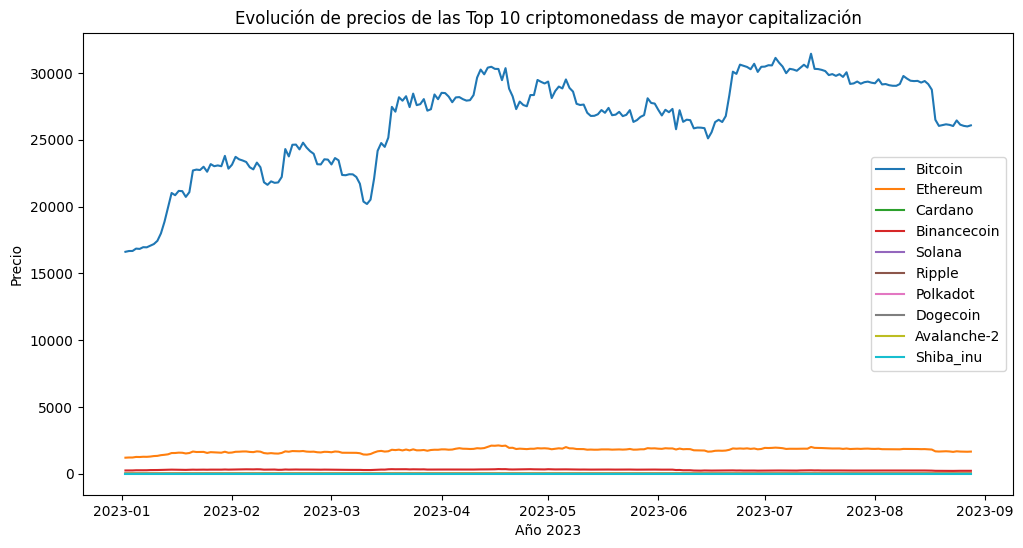

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_prices_df, x='date', y='bitcoin_price', label='Bitcoin')
sns.lineplot(data=combined_prices_df, x='date', y='ethereum_price', label='Ethereum')
sns.lineplot(data=combined_prices_df, x='date', y='cardano_price', label='Cardano')
sns.lineplot(data=combined_prices_df, x='date', y='binancecoin_price', label='Binancecoin')
sns.lineplot(data=combined_prices_df, x='date', y='solana_price', label='Solana')
sns.lineplot(data=combined_prices_df, x='date', y='ripple_price', label='Ripple')
sns.lineplot(data=combined_prices_df, x='date', y='polkadot_price', label='Polkadot')
sns.lineplot(data=combined_prices_df, x='date', y='dogecoin_price', label='Dogecoin')
sns.lineplot(data=combined_prices_df, x='date', y='avalanche-2_price', label='Avalanche-2')
sns.lineplot(data=combined_prices_df, x='date', y='shiba-inu_price', label='Shiba_inu')

plt.xlabel('Año 2023')
plt.ylabel('Precio')
plt.title('Evolución de precios de las Top 10 criptomonedass de mayor capitalización')
plt.legend()
plt.show()


Graficamos la evolución de precios en 20223 de las 10 criptomonedas. Observamos que hay escalas muy diferentes entre las criptomonedas, sobre todo el Bitcoin se diferencia mucho del resto. Vamos a normalizalizar variables. Pero antes calculamos, outliers, distribucion de frecuencias de cada uno, para saber por donde se ubicó el precio con mayor precuencia durante 2023

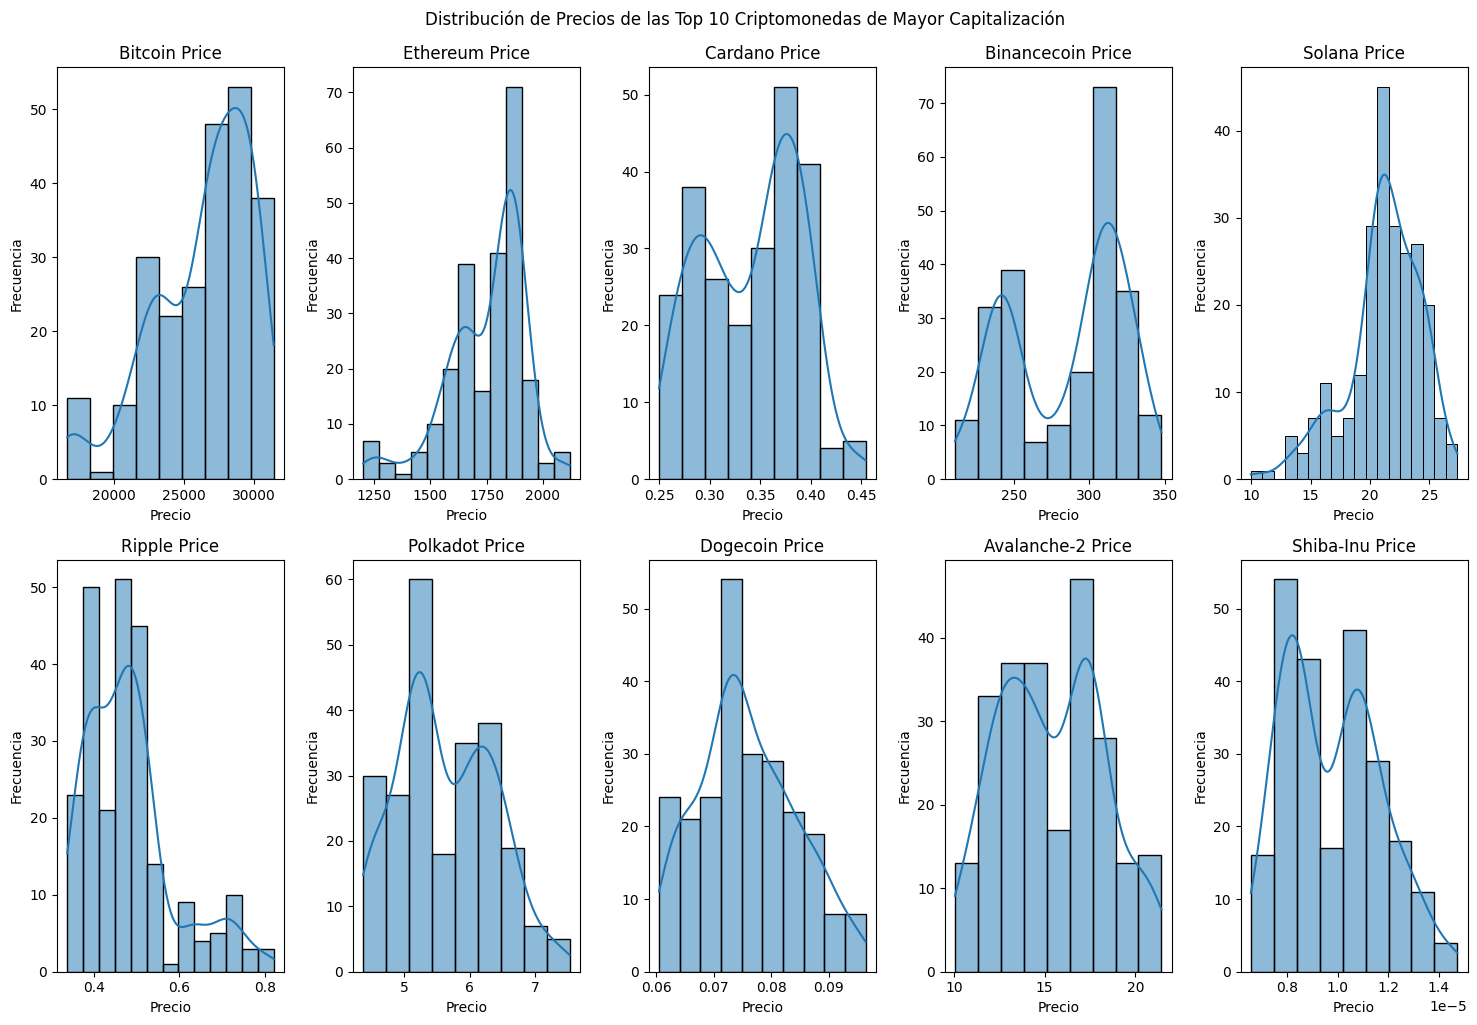

In [56]:
# Lista de criptomonedas
crypto_columns = ['bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price', 'solana_price',
                  'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price', 'shiba-inu_price']

# Tamaño de la figura
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

# Iterar a través de las criptomonedas y crear histogramas
for i, crypto in enumerate(crypto_columns):
    ax = axes[i]
    sns.histplot(data=combined_prices_df, x=crypto, ax=ax, kde=True)
    ax.set_xlabel('Precio')
    ax.set_ylabel('Frecuencia')
    ax.set_title(crypto.replace("_", " ").title())

# Ajustar los subplots y añadir título
plt.tight_layout()
plt.suptitle('Distribución de Precios de las Top 10 Criptomonedas de Mayor Capitalización', y=1.02)
plt.show()


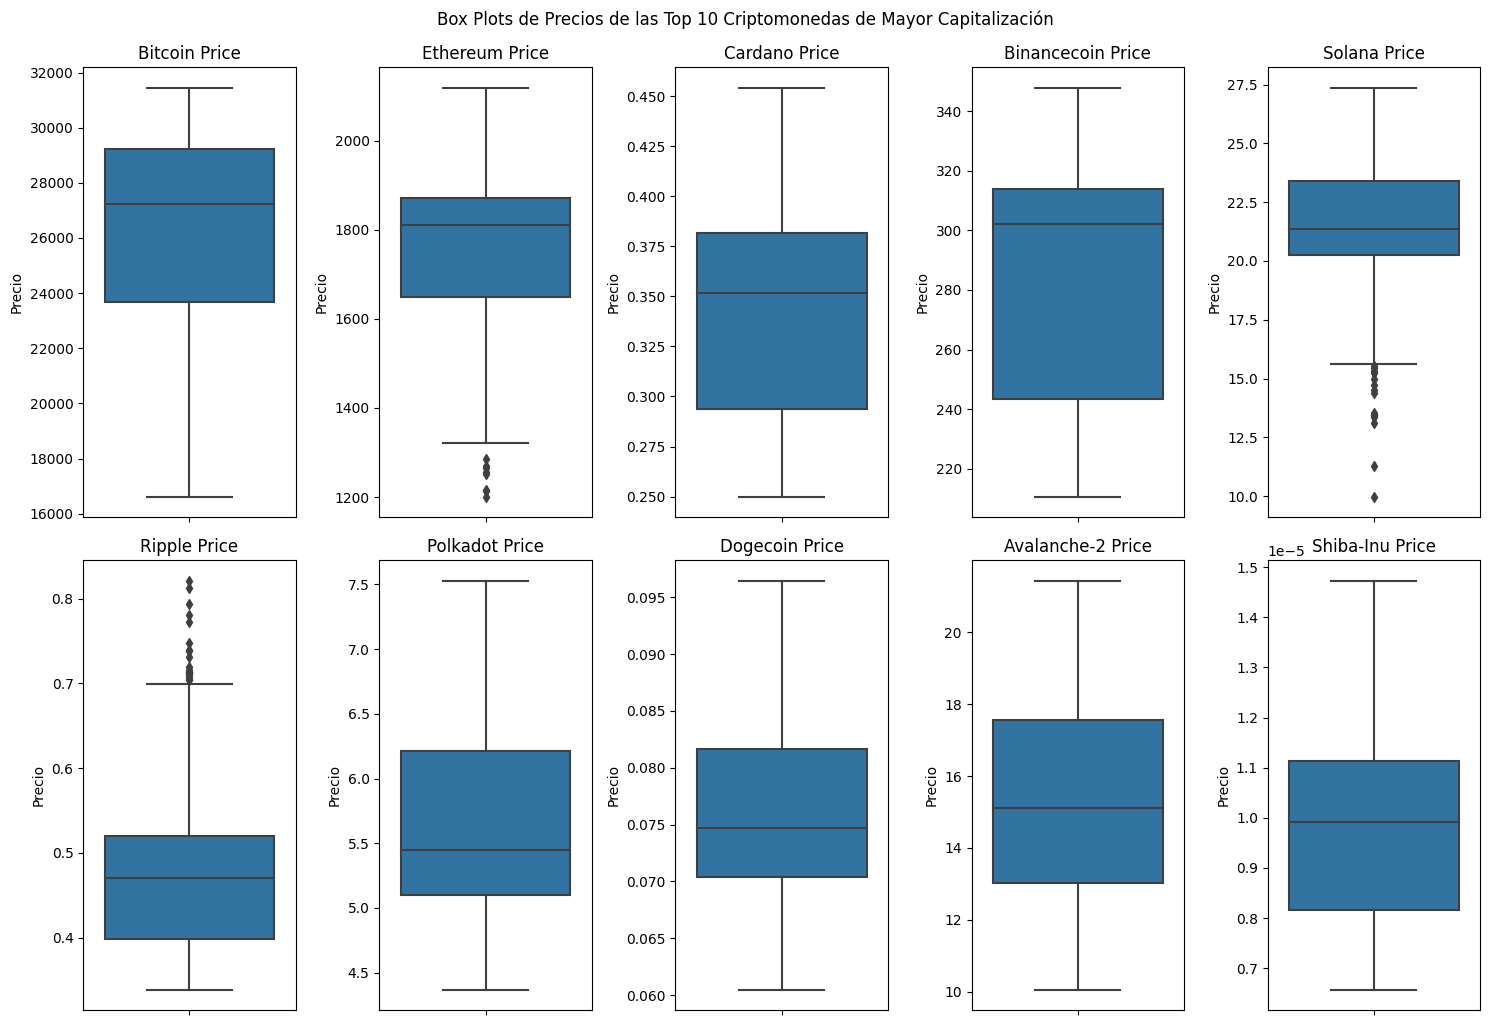

In [58]:
#Buscamos detectar outliers con boxplot.
# Lista de criptomonedas
crypto_columns = ['bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price', 'solana_price',
                  'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price', 'shiba-inu_price']

# Tamaño de la figura
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

# Iterar a través de las criptomonedas y crear box plots
for i, crypto in enumerate(crypto_columns):
    ax = axes[i]
    sns.boxplot(data=combined_prices_df, y=crypto, ax=ax)
    ax.set_ylabel('Precio')
    ax.set_title(crypto.replace("_", " ").title())

# Ajustar los subplots y añadir título
plt.tight_layout()
plt.suptitle('Box Plots de Precios de las Top 10 Criptomonedas de Mayor Capitalización', y=1.02)

# Mostrar el gráfico en pantalla
plt.show()


In [59]:
#Ver los outliers de Ethereum, Solana, y Ripple
# Por el grafico vemos que el umbral de ethereum es 1300
umbral_ethereum = 1300

# Filtrar los valores atípicos de ethereum
outliers_ethereum = combined_prices_df[combined_prices_df["ethereum_price"] < umbral_ethereum]

# Contar la cantidad de outliers de ethereum
num_outliers_ethereum = len(outliers_ethereum)
print("Número de outliers de Ethereum:", num_outliers_ethereum)



Número de outliers de Ethereum: 8


In [60]:
outliers_ethereum.head(8)

date  bitcoin_price  ethereum_price  cardano_price  binancecoin_price  \
0 2023-01-02   16615.969318     1200.659217       0.249938         244.064567   
1 2023-01-03   16674.342536     1214.378946       0.253948         245.429756   
2 2023-01-04   16677.646186     1214.760969       0.253144         246.211471   
3 2023-01-05   16855.174739     1256.436604       0.267948         259.128116   
4 2023-01-06   16832.098988     1250.792252       0.269366         256.474013   
5 2023-01-07   16960.232062     1270.028610       0.278878         259.800638   
6 2023-01-08   16950.861522     1264.836943       0.277452         261.319265   
7 2023-01-09   17074.615396     1284.575404       0.293615         273.536029   

   solana_price  ripple_price  polkadot_price  dogecoin_price  \
0      9.973949      0.339066        4.370398        0.070266   
1     11.266377      0.348570        4.488837        0.071426   
2     13.355392      0.343818        4.527619        0.070544   
3     13.456293      0.348149        4.632590        0.073256   
4     13.438480      0.338418        4.618387        0.071537   
5     13.524493      0.345120        4.687496        0.072600   
6     13.088904      0.344753        4.667868        0.072326   
7     14.366071      0.345226        4.781660        0.073354   

   avalanche-2_price  shiba-inu_price  
0          10.862361         0.000008  
1          11.153299         0.000008  
2          11.385008         0.000008  
3          12.082606         0.000008  
4          11.745685         0.000008  
5          11.784937         0.000008  
6          11.747206         0.000008  
7          12.026260         0.000009

In [61]:
#Ver los outliers de Solana

# Por el grafico vemos que el umbral de solana es 1300
umbral_solana = 15

# Filtrar los valores atípicos de solana
outliers_solana = combined_prices_df[combined_prices_df["solana_price"] < umbral_solana]

# Contar la cantidad de outliers de solana
num_outliers_solana = len(outliers_solana)
print("Número de outliers de Solana", num_outliers_solana)


Número de outliers de Solana 11


In [62]:
outliers_solana.head(7)

date  bitcoin_price  ethereum_price  cardano_price  binancecoin_price  \
0 2023-01-02   16615.969318     1200.659217       0.249938         244.064567   
1 2023-01-03   16674.342536     1214.378946       0.253948         245.429756   
2 2023-01-04   16677.646186     1214.760969       0.253144         246.211471   
3 2023-01-05   16855.174739     1256.436604       0.267948         259.128116   
4 2023-01-06   16832.098988     1250.792252       0.269366         256.474013   
5 2023-01-07   16960.232062     1270.028610       0.278878         259.800638   
6 2023-01-08   16950.861522     1264.836943       0.277452         261.319265   

   solana_price  ripple_price  polkadot_price  dogecoin_price  \
0      9.973949      0.339066        4.370398        0.070266   
1     11.266377      0.348570        4.488837        0.071426   
2     13.355392      0.343818        4.527619        0.070544   
3     13.456293      0.348149        4.632590        0.073256   
4     13.438480      0.338418        4.618387        0.071537   
5     13.524493      0.345120        4.687496        0.072600   
6     13.088904      0.344753        4.667868        0.072326   

   avalanche-2_price  shiba-inu_price  
0          10.862361         0.000008  
1          11.153299         0.000008  
2          11.385008         0.000008  
3          12.082606         0.000008  
4          11.745685         0.000008  
5          11.784937         0.000008  
6          11.747206         0.000008

In [63]:
#Ver los outliers de Ripple

# Por el grafico vemos que el umbral de Ripple es 1300
umbral_ripple = 0.69

# Filtrar los valores atípicos de Ripple
outliers_ripple = combined_prices_df[combined_prices_df["ripple_price"] > umbral_ripple]

# Contar la cantidad de outliers de Ripple
num_outliers_ripple = len(outliers_ripple)
print("Número de outliers de Ripple", num_outliers_ripple)


Número de outliers de Ripple 20


In [64]:
outliers_ripple.head(20)


date  bitcoin_price  ethereum_price  cardano_price  \
193 2023-07-14   31446.014971     2003.253616       0.356884   
194 2023-07-15   30311.827808     1935.940241       0.328667   
195 2023-07-16   30297.971400     1931.389384       0.325938   
196 2023-07-17   30237.334785     1923.035990       0.314728   
197 2023-07-18   30147.860079     1912.122836       0.312604   
198 2023-07-19   29848.032273     1897.199113       0.306933   
199 2023-07-20   29919.874838     1889.223806       0.324082   
200 2023-07-21   29787.041530     1891.014505       0.315765   
201 2023-07-22   29914.682728     1891.472403       0.313171   
202 2023-07-23   29710.155936     1858.311196       0.308174   
203 2023-07-24   30057.956719     1887.826981       0.317034   
204 2023-07-25   29184.901913     1850.431151       0.305335   
205 2023-07-26   29222.974630     1857.596593       0.303891   
206 2023-07-27   29363.672908     1871.533106       0.306585   
207 2023-07-28   29200.244001     1858.777021       0.307431   
208 2023-07-29   29314.097387     1874.693995       0.309920   
209 2023-07-30   29356.747746     1880.918077       0.312612   
210 2023-07-31   29277.755810     1861.869910       0.315337   
211 2023-08-01   29233.136366     1857.276196       0.307346   
212 2023-08-02   29537.109747     1869.745109       0.309375   

     binancecoin_price  solana_price  ripple_price  polkadot_price  \
193         255.788291     25.990368      0.812509        5.541879   
194         247.695854     26.708371      0.719679        5.447710   
195         251.092986     27.351376      0.713256        5.430796   
196         242.749491     27.365080      0.747667        5.309371   
197         244.197168     26.861798      0.739496        5.302138   
198         240.270930     25.526176      0.781263        5.176626   
199         241.332773     26.353312      0.821237        5.198504   
200         242.624777     25.335069      0.793284        5.348583   
201         243.768842     25.589510      0.772681        5.485974   
202         240.537852     24.456785      0.731402        5.295907   
203         242.381424     24.773704      0.737991        5.397330   
204         238.965494     23.422634      0.703525        5.219262   
205         237.730347     23.267717      0.710253        5.175287   
206         239.020092     25.151988      0.715877        5.238608   
207         240.417367     25.093488      0.713436        5.232445   
208         241.857825     24.825804      0.712297        5.216726   
209         242.556325     25.165048      0.712607        5.252698   
210         242.540332     24.266784      0.704911        5.187981   
211         241.193557     23.756659      0.699030        5.111470   
212         247.428737     23.925547      0.707216        5.189948   

     dogecoin_price  avalanche-2_price  shiba-inu_price  
193        0.070533          14.073462         0.000008  
194        0.068471          14.621206         0.000008  
195        0.072033          14.827656         0.000008  
196        0.069662          14.296980         0.000008  
197        0.069974          14.430245         0.000008  
198        0.068610          13.785500         0.000008  
199        0.070176          14.003989         0.000008  
200        0.070596          13.846493         0.000008  
201        0.073368          13.986579         0.000008  
202        0.070418          13.460285         0.000008  
203        0.071893          13.554560         0.000008  
204        0.074431          13.112017         0.000008  
205        0.081719          13.342366         0.000008  
206        0.077942          13.263779         0.000008  
207        0.077524          13.138965         0.000008  
208        0.077283          13.236289         0.000008  
209        0.080199          13.247479         0.000009  
210        0.078035          13.132356         0.000008  
211        0.077873          12.829237         0.000008  
212        0.077873          12.84

En cuanto a los outliers, vemos que tanto Ethereum como Solana, tienen 8 y 11, respectivamente, que marcan los mínimos precios de principios de enero, y luego el mercado entró en una recuperación para 2023. En cambio Ripple, esta márcando outliers en sus máximos a fines de julio y agosto, dando cuenta de que en entre fines de julio y agosto un una fuerte alza de precios desde fine de julio y siguió en agosto.Eventualmente podemos quitar los outliers para calcular el precio promedio del año. Dejamos los outliers de Ethereum y Solana porque son pocos, para mantener la integridad temporal y poder efectuar un analisis comparativo con el resto de las monedas. En el caso de Ripple los dejamos porque justamente el análisis marca que una aceleración alcista reciente de las moneda.

Noticias Ripple, en agosto Ripple obtvo victoria parcial ante la sec y animo a inversorres a seguir invirtiendo. informes recientes señala que :
-Los inversores institucionales han invertido en Ripple (XRP) durante 16 semanas consecutivas según un informe de CoinShares.
-Los activos bajo gestión de productos de inversión en XRP han aumentado un 127% desde principios de año.
-Se han invertido mas de $11,25 millones en XRP desde comienzos de 2023.

https://decrypt.co/es/152465/inversores-institucionales-apuestan-fuertemente-por-xrp-tras-victoria-parcial-de-ripple-vs-la-sec

In [65]:
combined_prices_df.describe()

date  bitcoin_price  ethereum_price  cardano_price  \
count                  239     239.000000      239.000000     239.000000   
mean   2023-05-01 00:00:00   26358.413198     1752.097049       0.341375   
min    2023-01-02 00:00:00   16615.969318     1200.659217       0.249938   
25%    2023-03-02 12:00:00   23679.747643     1649.678176       0.293607   
50%    2023-05-01 00:00:00   27222.937747     1810.466255       0.351912   
75%    2023-06-29 12:00:00   29220.459339     1871.081049       0.381519   
max    2023-08-28 00:00:00   31446.014971     2118.598789       0.454158   
std                    NaN    3529.435185      171.294534       0.048541   

       binancecoin_price  solana_price  ripple_price  polkadot_price  \
count         239.000000    239.000000    239.000000      239.000000   
mean          284.922734     21.237147      0.483000        5.627230   
min           210.588285      9.973949      0.338418        4.369109   
25%           243.510488     20.262044      0.398184        5.097417   
50%           302.135816     21.351397      0.470112        5.447710   
75%           313.946589     23.398726      0.520306        6.212973   
max           347.865589     27.365080      0.821237        7.527218   
std            37.615014      3.086234      0.104449        0.728696   

       dogecoin_price  avalanche-2_price  shiba-inu_price  
count      239.000000         239.000000       239.000000  
mean         0.075883          15.384368         0.000010  
min          0.060479          10.060003         0.000007  
25%          0.070414          13.035421         0.000008  
50%          0.074670          15.110057         0.000010  
75%          0.081665          17.554164         0.000011  
max          0.096450          21.428867         0.000015  
std          0.008528           2.848712         0.000002

In [66]:
from sklearn.preprocessing import MinMaxScaler
# Extraer las fechas antes de la normalización
dates = combined_prices_df['date']

# Normalizar los precios de las criptomonedas (excluyendo la columna de fechas)
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(combined_prices_df.drop('date', axis=1))

# Crear un nuevo DataFrame normalizado
nor_combined_prices_df = pd.DataFrame(normalized_prices, columns=combined_prices_df.columns[1:])

# Agregar las fechas de nuevo al DataFrame normalizado
nor_combined_prices_df.insert(0, 'date', dates)

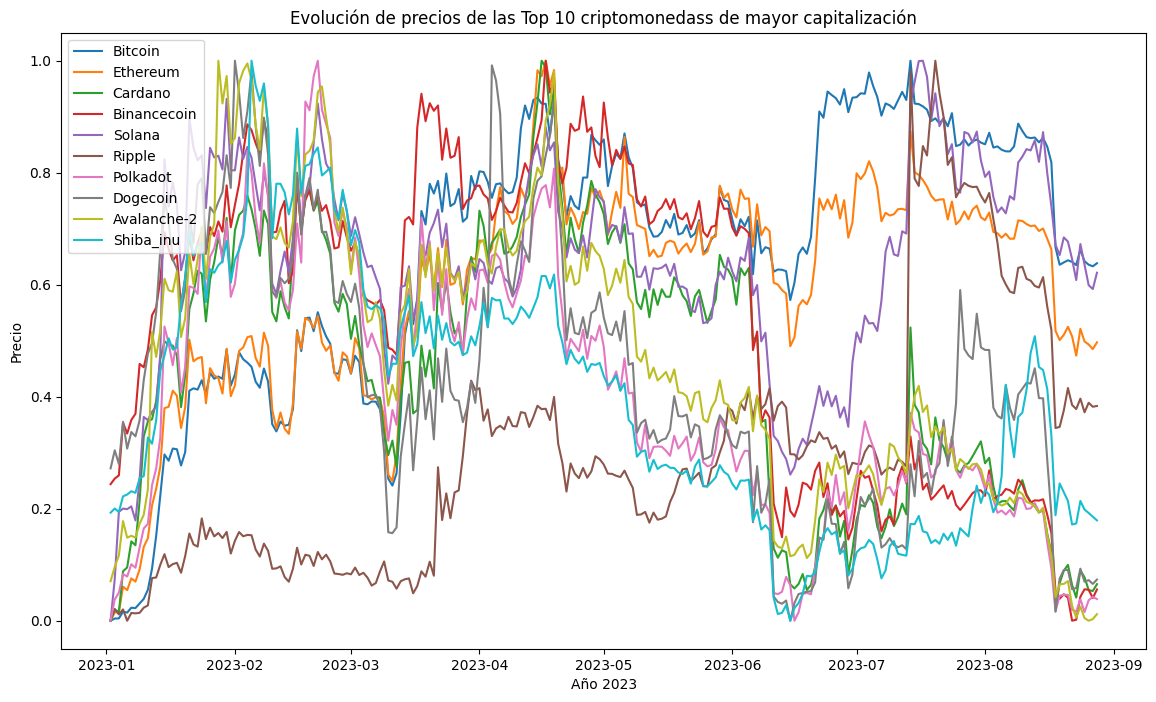

In [67]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=nor_combined_prices_df, x='date', y='bitcoin_price', label='Bitcoin')
sns.lineplot(data=nor_combined_prices_df, x='date', y='ethereum_price', label='Ethereum')
sns.lineplot(data=nor_combined_prices_df, x='date', y='cardano_price', label='Cardano')
sns.lineplot(data=nor_combined_prices_df, x='date', y='binancecoin_price', label='Binancecoin')
sns.lineplot(data=nor_combined_prices_df, x='date', y='solana_price', label='Solana')
sns.lineplot(data=nor_combined_prices_df, x='date', y='ripple_price', label='Ripple')
sns.lineplot(data=nor_combined_prices_df, x='date', y='polkadot_price', label='Polkadot')
sns.lineplot(data=nor_combined_prices_df, x='date', y='dogecoin_price', label='Dogecoin')
sns.lineplot(data=nor_combined_prices_df, x='date', y='avalanche-2_price', label='Avalanche-2')
sns.lineplot(data=nor_combined_prices_df, x='date', y='shiba-inu_price', label='Shiba_inu')

plt.xlabel('Año 2023')
plt.ylabel('Precio')
plt.title('Evolución de precios de las Top 10 criptomonedass de mayor capitalización')
plt.legend()
plt.show()


<Figure size 1000x800 with 0 Axes>

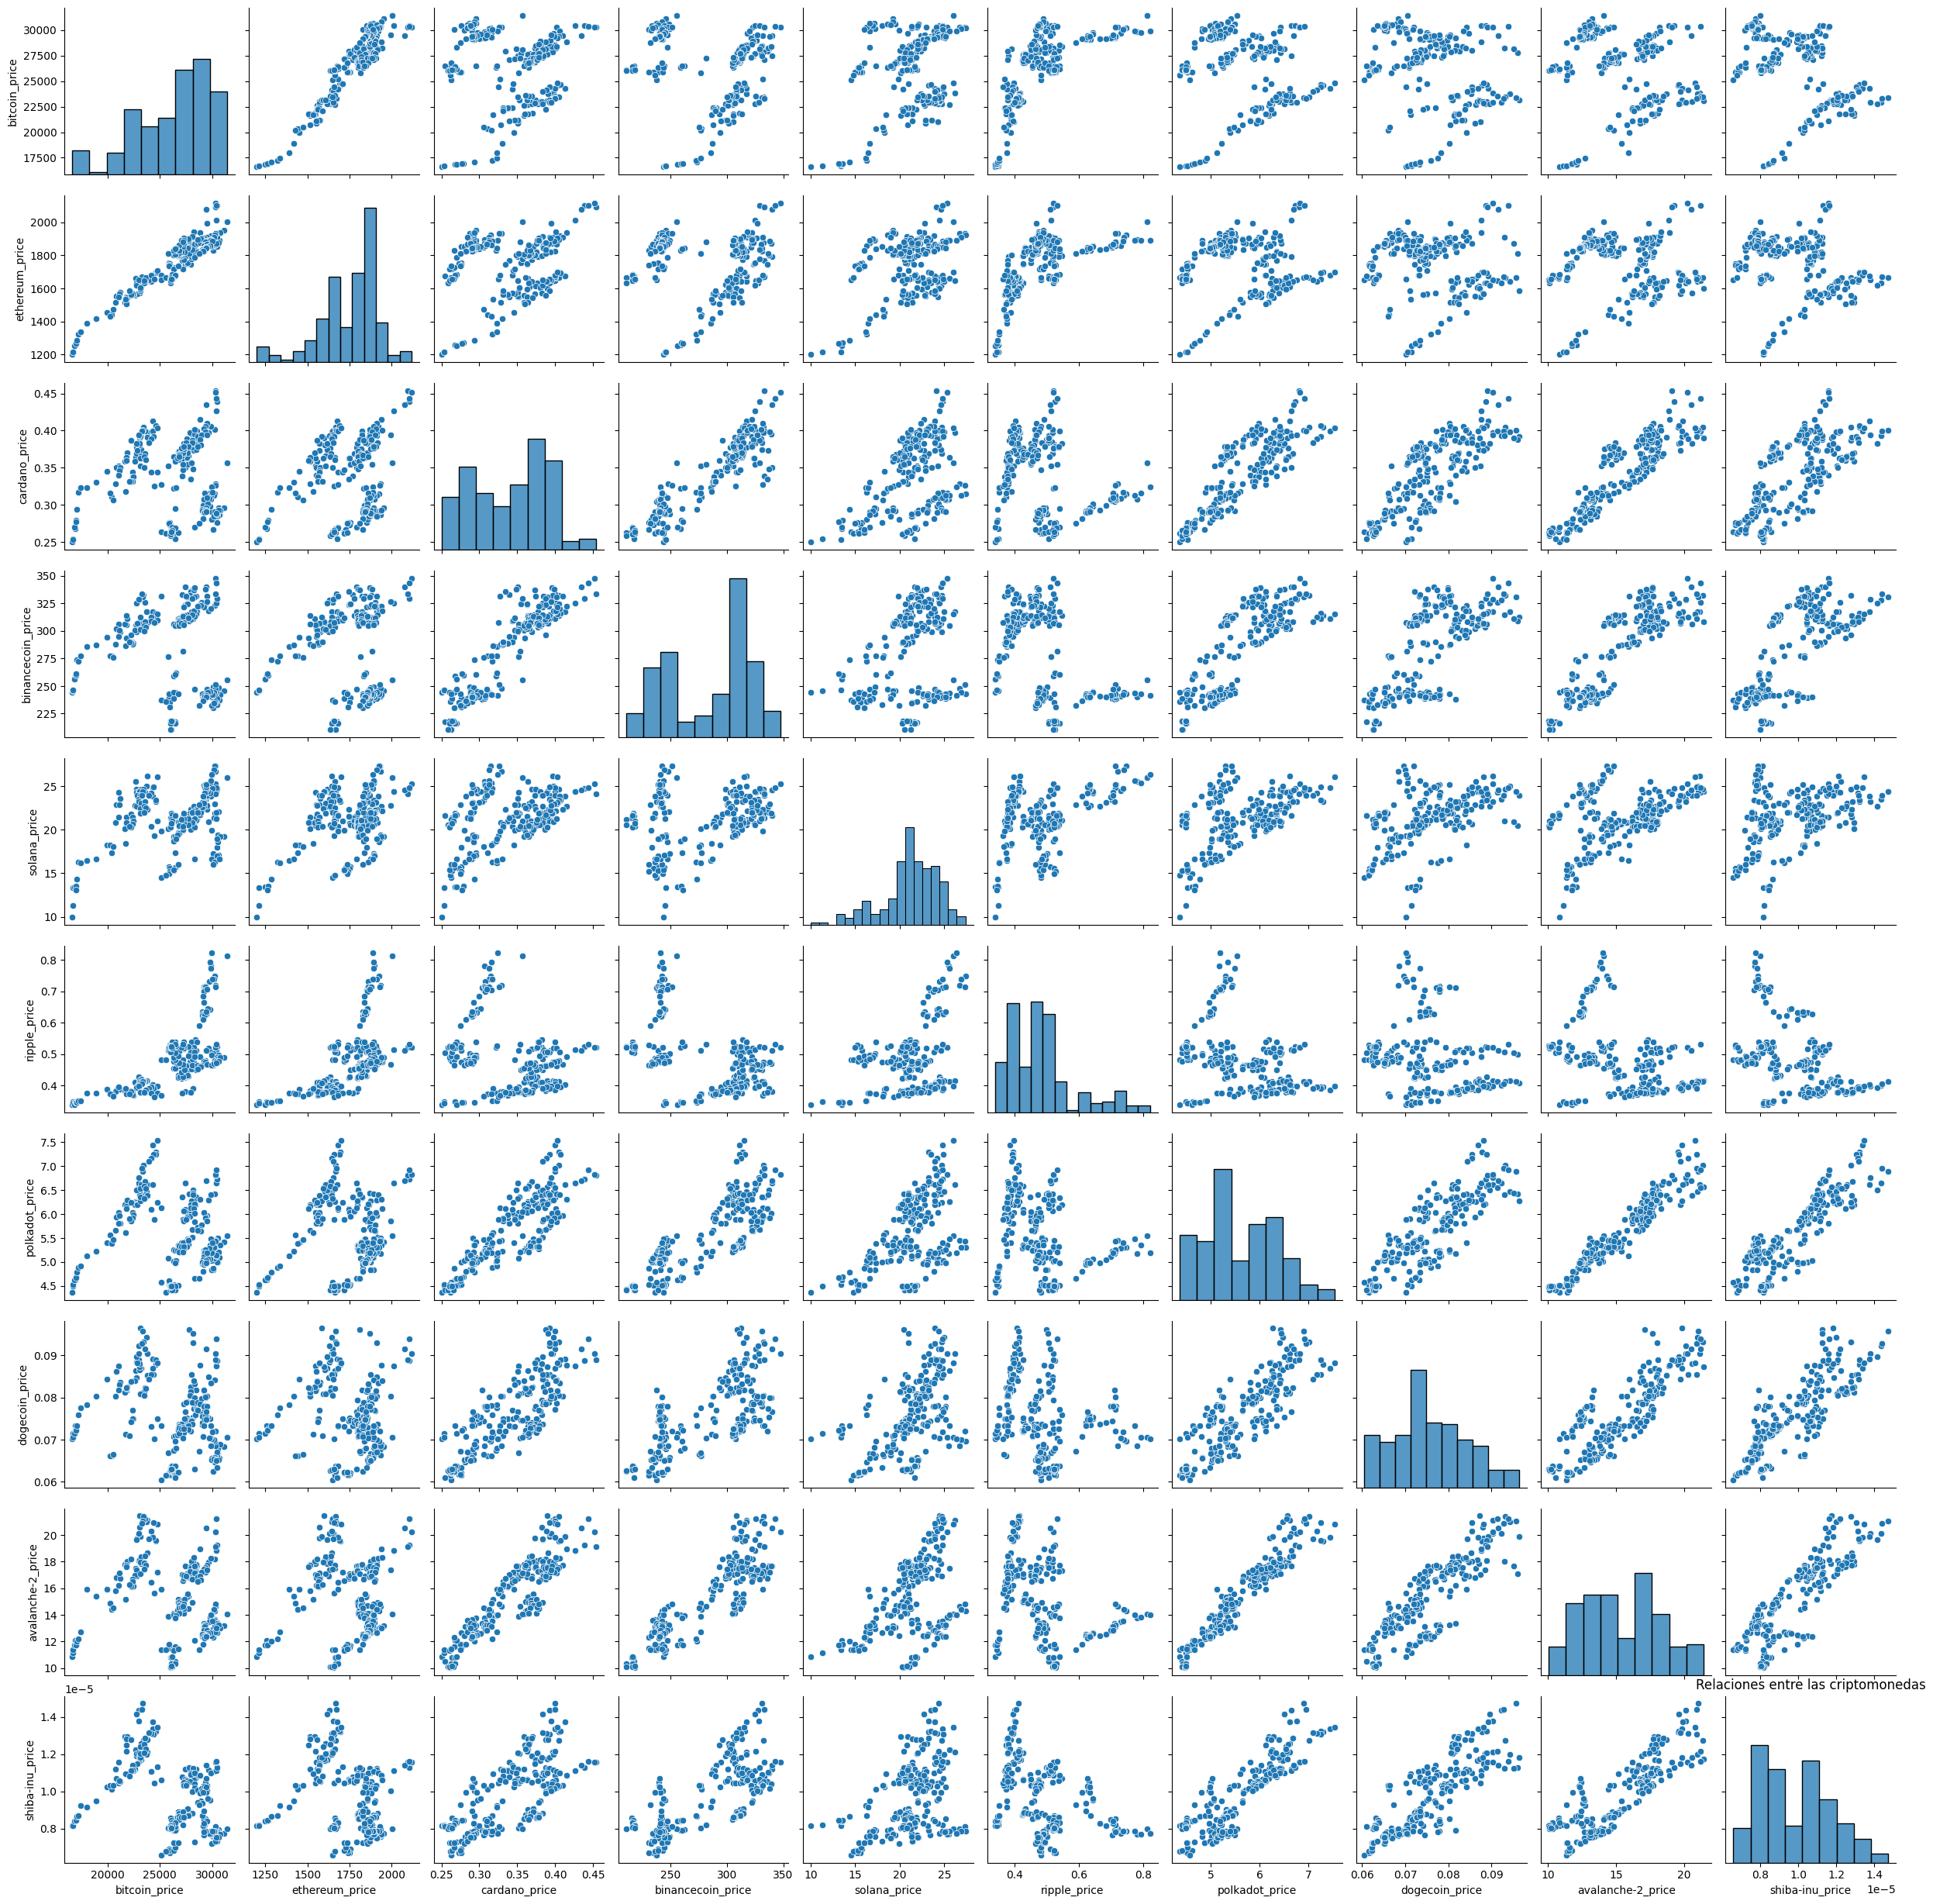

<Figure size 640x480 with 0 Axes>

In [69]:
 
# Convertir la columna de fecha a formato datetime
combined_prices_df.loc[:,'date'] = pd.to_datetime(combined_prices_df['date'])

# Definir la lista de criptomonedas para facilitar el análisis
cryptocurrencies = combined_prices_df.columns[1:]

# Scatter plot para visualizar las relaciones entre criptomonedas
plt.figure(figsize=(10, 8))
sns.pairplot(combined_prices_df, x_vars=cryptocurrencies, y_vars=cryptocurrencies)
plt.title("Relaciones entre las criptomonedas")
plt.show()







Tanto en el scatterplot como en la matriz de correlación se observa que Bitcoin y Ethereum tienen una alta correlacón positiva. Cuando Bitcoin sube, también sube Ethereum, y lo mismo cuando el sentimiento es negativo hacia estas monedas, cuando baja una, también baja la otra. Luego, se ubican cardano, binance, y dogcoin, avalanche-2 y polkadot con uan fuerte correlacion positiva.  Estos es, cuando una de ellas se incrementa, tambien se incrementa la otra, aunque la correlación no implique que el ascenso de una moneda sea la causa de la otra. Solana en tanto, tiene como la mayor correlación, un 50% de correlación con ethereum, y 36% con Bitcoin, no tiene tanta correlación

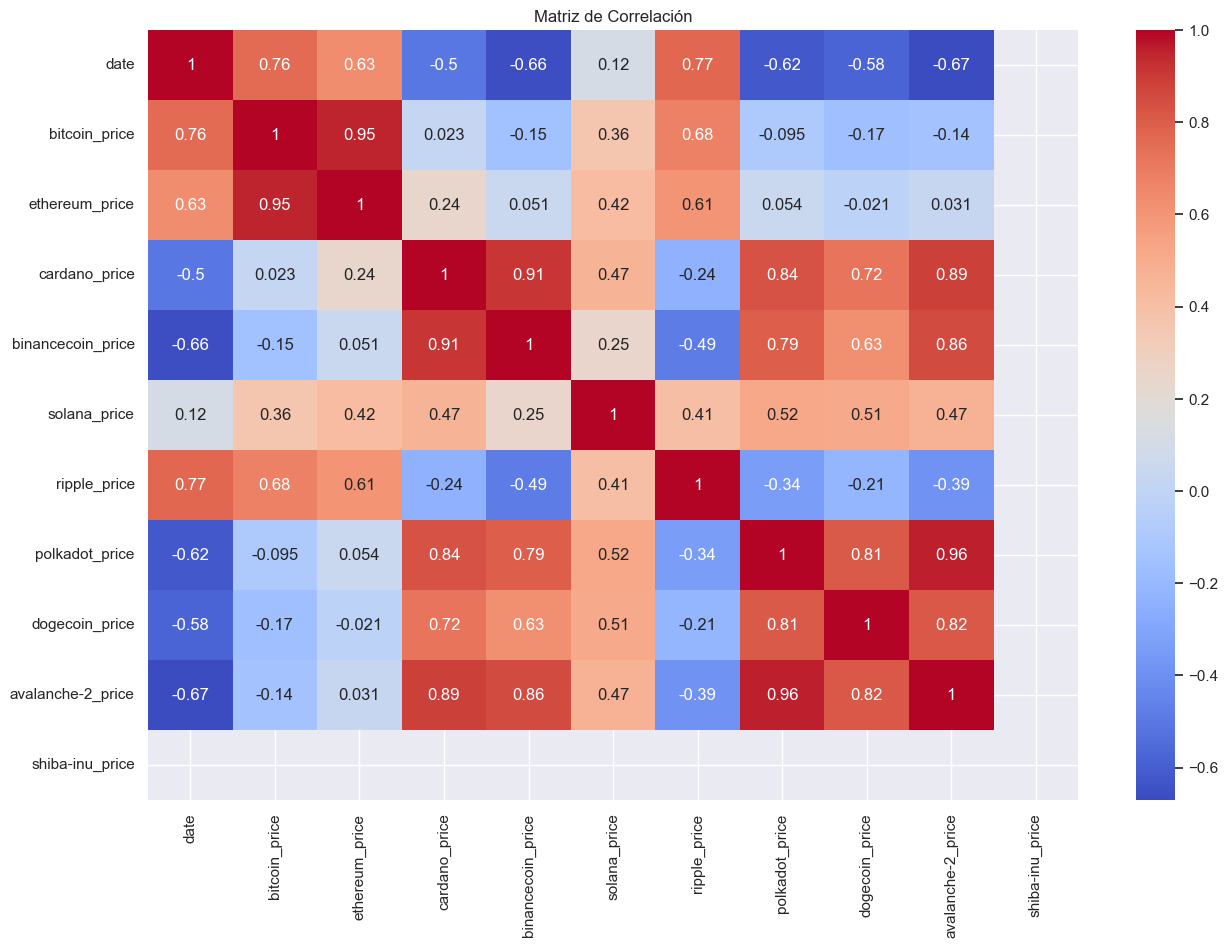

In [161]:
#Correlaciones entre variables
correlation_matrix = combined_prices_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()





In [90]:
#Calculamos variaciones en los precios


# Obtener la primera y última fecha en el dataframe
first_date = combined_prices_df['date'].iloc[0]
last_date = combined_prices_df['date'].iloc[-1]

# Filtrar el dataframe por la primera y última fecha
first_price_df = combined_prices_df[combined_prices_df['date'] == first_date]
last_price_df = combined_prices_df[combined_prices_df['date'] == last_date]

# Calcular la variación del precio para cada criptomoneda
price_columns = ['bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price',
'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price', 'solana_price']

for crypto in price_columns:
    first_price = first_price_df[crypto].values[0]
    last_price = last_price_df[crypto].values[0]

    
    relative_change = ((last_price - first_price) / first_price) * 100
    print(f"Variación de {crypto} durante lo que va del año 2023:", round(relative_change,2), "%")

    
    




Variación de bitcoin_price durante lo que va del año 2023: 56.97 %
Variación de ethereum_price durante lo que va del año 2023: 38.0 %
Variación de cardano_price durante lo que va del año 2023: 5.33 %
Variación de binancecoin_price durante lo que va del año 2023: -10.58 %
Variación de ripple_price durante lo que va del año 2023: 54.41 %
Variación de polkadot_price durante lo que va del año 2023: 2.77 %
Variación de dogecoin_price durante lo que va del año 2023: -10.16 %
Variación de avalanche-2_price durante lo que va del año 2023: -6.16 %
Variación de solana_price durante lo que va del año 2023: 108.35 %


Entre las criptomoedas de mayor capitalización, durante el 2023 las monedas de mejor desempeño resultaron Solana, (108.35%), el Bitcoin (56,97%),  Ripple(54,41,%) y Ethereum(38%). Vamos a tomar estas 4 para acotar el análisis y compararlas con el desempeño de las acciones de Estados Unidos. Elegimos el SPY, que es el ticker y el nombre coloquial del derivado (ETF) que emula el comportamiento del S&P 500, el índice que mira el comportamiento de las 500 mayores empresas de la Economía de EEUU. Es un buen indicador para medir la salud de las economía y las empresas en general, que a su vez están muy afectadas por la inflación e inflación esperada, que se observa en las políticas que toma la Reserva Federal de los Estados Unidos, a través de la política monetaria y en particular de los movicmientos en las tasa de interés de referencia. Esto afecta particularmente el mercado de criptomonedas, ya que si se espera que la economía de EEUU empeore, en el sentido de que suba la inflación y la FED se vea obligada a subir las tasas, habrá más retracción en la inversión y  fuga de capitales hacia activos considerados más seguros, que tendrán un rendimiento mayor, y son considerados y menos volátiles. Por el contrario, si hay mejora en la marcha de las empresas y de la saluda de la economía en general, con una baja inflación, la FED hará la política contraria, expandirá más dinero en la economía para invertir, y las criptomonedas tendrán mayor margen de aceptación enre los inversores.    

CAbbe destaacar que las variación del precio a una medida aproximada al ROI, el retorno de la inversión, y por lo tanto puede utilizarse como una  medida aproximada del ROI, KPI imprescindible para evaluar en qué moneda invertir. Más abajo hacemos el cálculo del ROI, para parobar eta afirmación. 

In [72]:
#importamos la base de datos del SPY

# Cambia la ruta del archivo si es necesario
spy = "SPY__S&P_500_2023.csv"

# Utiliza pandas para leer el archivo CSV
df_spy = pd.read_csv(spy)

# Ahora puedes trabajar con los datos
df_spy.head()  # Imprime las primeras filas del DataFrame


Date   Price    Open    High     Low   Vol. Change %
0  08/18/2023  681.49  681.76  682.19  679.99  0.56K   -1.08%
1  08/17/2023  688.94  686.00  689.95  685.88  0.53K    0.30%
2  08/16/2023  686.85  687.50  688.54  686.22  0.66K   -0.43%
3  08/15/2023  689.80  691.16  694.37  689.80  1.09K    0.38%
4  08/14/2023  687.22  687.16  688.58  687.16  0.42K    0.38%

In [73]:
# Renombra la columna "date" a "new_date" (cambia "new_date" al nombre deseado)
df_spy.rename(columns={"Date": "date", "Price":"price"}, inplace=True)

In [74]:
# Selecciona las columnas "date" y "price"
df_spy_price = df_spy[["date", "price"]]

In [75]:
type(df_spy_price["date"])

pandas.core.series.Series

In [76]:
type(combined_prices_df["date"])

pandas.core.series.Series

In [102]:
#Cambiamos el formato de la columna date de SPY para poder hacer luego la fusión con la serie de tiempo de los precios de las criptomonedas
#from functools import reduce

# df_spy_price tiene la columna "date" en formato de cadena
# combined_prices_df tiene la columna "date" en formato datetime64[ns]

# Convertir la columna "date" en df_spy_price a datetime64[ns] usando .loc[]
df_spy_price.loc[:, 'date'] = pd.to_datetime(df_spy_price['date'])

combined_prices_df.loc[:,"date"]= pd.to_datetime(combined_prices_df['date'])


In [103]:
print(combined_prices_df.columns)
print(df_spy_price.columns)


Index(['date', 'bitcoin_price', 'ethereum_price', 'cardano_price',
       'binancecoin_price', 'solana_price', 'ripple_price', 'polkadot_price',
       'dogecoin_price', 'avalanche-2_price', 'shiba-inu_price'],
      dtype='object')
Index(['date', 'price'], dtype='object')


In [79]:
print(combined_prices_df['date'].dtype)
print(df_spy_price['date'].dtype)


datetime64[ns]
object


In [104]:
df_spy_price.loc[:, 'date'] = pd.to_datetime(df_spy_price['date'])


In [107]:
#Procedemos a realizar la fusión

# tenemos los DataFrames 'combined_prices_df' y 'df_spy_price'

# Convertir la columna 'date' a tipo datetime en ambos DataFrames, lo vueve  a pedir para que funcione el código.
combined_prices_df['date'] = pd.to_datetime(combined_prices_df['date'])
df_spy_price['date'] = pd.to_datetime(df_spy_price['date'])

# Fusionar los DataFrames en función de la columna 'date'
combined_prices_spy_df = pd.merge(combined_prices_df, df_spy_price, on='date', how='outer')

# Ordenar los datos por fecha
combined_prices_spy_df = combined_prices_spy_df.sort_values(by='date')

print(combined_prices_spy_df.head())


        date  bitcoin_price  ethereum_price  cardano_price  binancecoin_price  \
0 2023-01-02       16615.97         1200.66           0.25             244.06   
1 2023-01-03       16674.34         1214.38           0.25             245.43   
2 2023-01-04       16677.65         1214.76           0.25             246.21   
3 2023-01-05       16855.17         1256.44           0.27             259.13   
4 2023-01-06       16832.10         1250.79           0.27             256.47   

   solana_price  ripple_price  polkadot_price  dogecoin_price  \
0          9.97          0.34            4.37            0.07   
1         11.27          0.35            4.49            0.07   
2         13.36          0.34            4.53            0.07   
3         13.46          0.35            4.63            0.07   
4         13.44          0.34            4.62            0.07   

   avalanche-2_price  shiba-inu_price   price  
0              10.86              0.0     NaN  
1              11.15      

C:\Users\maral\AppData\Local\Temp\ipykernel_21736\2215503910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spy_price['date'] = pd.to_datetime(df_spy_price['date'])


In [110]:
# Renombrar la columna 'price' a 'spy_price'
combined_prices_spy_df.rename(columns={'price': 'spy_price'}, inplace=True)

# Contar los valores nulos en la columna 'spy_price'
n_nulls = combined_prices_spy_df['spy_price'].isnull().sum()
print(f"Número de valores nulos en spy_price: {n_nulls}")




Número de valores nulos en spy_price: 80


Aca observamos que SPY tiene valores nulos, esto se debe a que SPY no opera sabados ni domingo ni feriados, como sí lo hacen las criptomonedas. Por lo tanto establecemos algunos criterios para llenar los nulos. E ngenerla se puede tomar para lso sabados y domingo el último dia habil de la seman aanterior, y para el primer dato del año, repetimos el dato del primer día habil de 2023.

In [111]:
import datetime

def count_weekdays(year, day_of_week):
    count = 0
    start_date = datetime.date(year, 1, 1)
    end_date = datetime.date(year, 8, 19)
    
    delta = datetime.timedelta(days=1)
    current_date = start_date
    
    while current_date <= end_date:
        if current_date.weekday() == day_of_week:
            count += 1
        current_date += delta
    
    return count

year = 2023  # Cambia esto al año que desees
saturdays = count_weekdays(year, 5)  # 5 representa el sábado
sundays = count_weekdays(year, 6)  # 6 representa el domingo

print(f"En el año {year} hay {saturdays} sábados y {sundays} domingos.")


En el año 2023 hay 33 sábados y 33 domingos.


In [112]:
#Llenar los valores nulos en 'spy_price' con el valor del día anterior
combined_prices_spy_df['spy_price'].fillna(method='ffill', inplace=True)

In [113]:
combined_prices_spy_df.head(50)

date  bitcoin_price  ethereum_price  cardano_price  \
0  2023-01-02       16615.97         1200.66           0.25   
1  2023-01-03       16674.34         1214.38           0.25   
2  2023-01-04       16677.65         1214.76           0.25   
3  2023-01-05       16855.17         1256.44           0.27   
4  2023-01-06       16832.10         1250.79           0.27   
5  2023-01-07       16960.23         1270.03           0.28   
6  2023-01-08       16950.86         1264.84           0.28   
7  2023-01-09       17074.62         1284.58           0.29   
8  2023-01-10       17194.91         1321.68           0.32   
9  2023-01-11       17436.90         1336.02           0.32   
10 2023-01-12       17996.83         1389.77           0.32   
11 2023-01-13       18866.81         1417.13           0.33   
12 2023-01-14       19941.78         1453.38           0.35   
13 2023-01-15       21019.21         1549.11           0.35   
14 2023-01-16       20853.23         1551.32           0.35   
15 2023-01-17       21175.34         1577.73           0.35   
16 2023-01-18       21156.78         1569.53           0.35   
17 2023-01-19       20726.84         1516.56           0.33   
18 2023-01-20       21081.67         1550.51           0.34   
19 2023-01-21       22705.83         1661.33           0.36   
20 2023-01-22       22771.02         1625.91           0.37   
21 2023-01-23       22736.66         1630.84           0.38   
22 2023-01-24       22984.87         1632.96           0.38   
23 2023-01-25       22610.01         1557.06           0.36   
24 2023-01-26       23180.42         1614.68           0.37   
25 2023-01-27       23024.75         1602.85           0.38   
26 2023-01-28       23082.86         1598.47           0.39   
27 2023-01-29       23022.23         1573.06           0.38   
28 2023-01-30       23797.46         1646.52           0.40   
29 2023-01-31       22840.39         1568.65           0.37   
30 2023-02-01       23137.32         1586.54           0.39   
31 2023-02-02       23725.16         1642.86           0.40   
32 2023-02-03       23539.68         1648.68           0.40   
33 2023-02-04       23451.58         1665.43           0.40   
34 2023-02-05       23340.35         1667.27           0.40   
35 2023-02-06       22946.29         1631.37           0.39   
36 2023-02-07       22786.48         1617.14           0.38   
37 2023-02-08       23294.91         1672.82           0.40   
38 2023-02-09       22947.51         1651.41           0.39   
39 2023-02-10       21820.89         1546.38           0.36   
40 2023-02-11       21630.13         1515.53           0.36   
41 2023-02-12       21889.43         1541.97           0.37   
42 2023-02-13       21779.87         1515.33           0.36   
43 2023-02-14       21807.83         1506.92           0.36   
44 2023-02-15       22220.07         1556.96           0.39   
45 2023-02-16       24307.88         1674.86           0.41   
46 2023-02-17       23756.91         1646.14           0.39   
47 2023-02-18       24628.82         1697.08           0.41   
48 2023-02-19       24642.79         1692.52           0.41   
49 2023-02-20       24284.48         1680.38           0.40   

    binancecoin_price  solana_price  ripple_price  polkadot_price  \
0              244.06          9.97          0.34            4.37   
1              245.43         11.27          0.35            4.49   
2              246.21         13.36          0.34            4.53   
3              259.13         13.46          0.35            4.63   
4              256.47         13.44          0.34            4.62   
5              259.80         13.52          0.35            4.69   
6              261.32         13.09          0.34            4.67   
7              273.54         14.37          0.35            4.78   
8              272.73         16.30          0.35            4.89   
9              277.10         16.20          0.35            4.92   
10             285.47         16.46 

In [114]:
# Asigno valor al registro cero que aun quedó con NaN
valor_x = 561.35


combined_prices_spy_df.loc[0, 'spy_price'] = valor_x



In [132]:
#Confirmamos que spy nno tenga valores nulos
null_count = combined_prices_spy_df['spy_price'].isnull().sum()
print(f"Número de valores nulos en spy_price: {null_count}")


Número de valores nulos en spy_price: 0


In [133]:

# Exportar el DataFrame a un archivo CSV
nombre_archivo = "combined_prices_spy_df.csv"
df.to_csv(nombre_archivo, index=False)

Ahora nos preparamos para elegir los KPIS. El KPI1 que vamso a considerar, es la variación en el precio de las criptomoneda durante 2023, y una medida similar es el ROI el retorno de inversión, que básicamente aquí son dos medidas que significan los mismo y que pueden utilizarse  para calcular la criptomoneda que mejor desempeño tuvo durante 2023

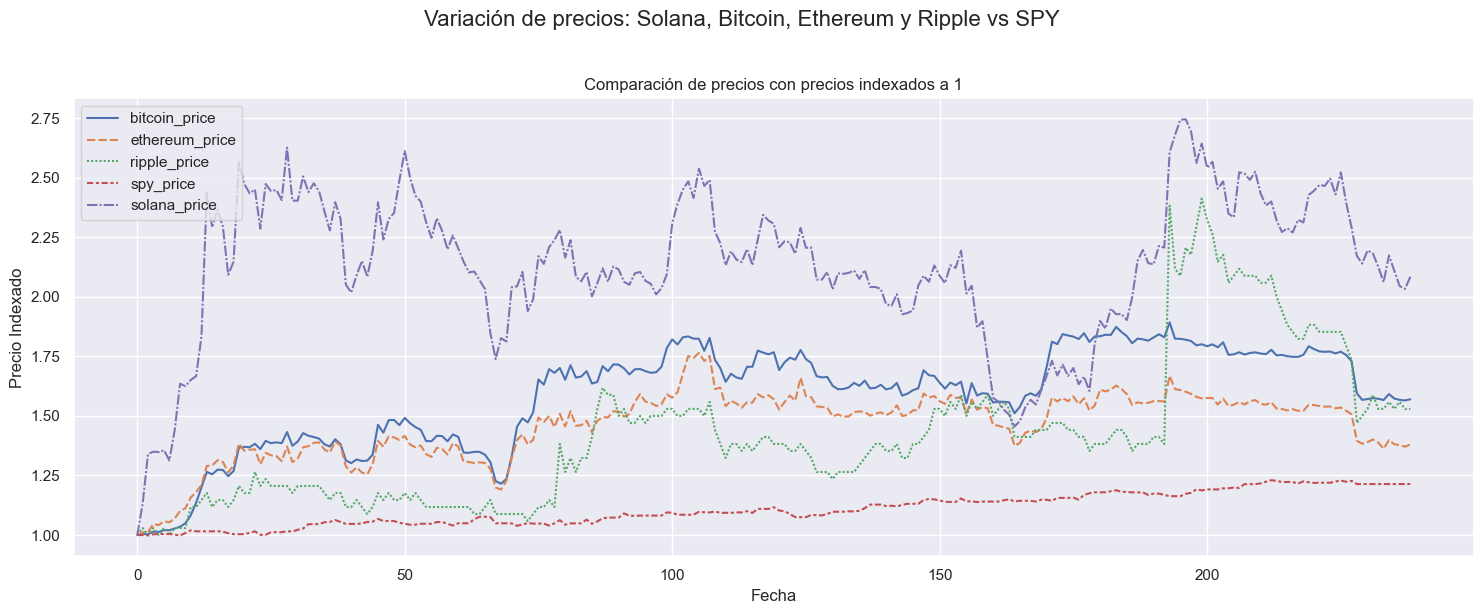

In [155]:

#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6)) 
# Divide los precios por el primer valor para indexarlos
combined_prices_spy_df['bitcoin_price'] = combined_prices_spy_df['bitcoin_price'] / combined_prices_spy_df['bitcoin_price'].iloc[0]
combined_prices_spy_df['spy_price'] = combined_prices_spy_df['spy_price'] / combined_prices_spy_df['spy_price'].iloc[0]
combined_prices_spy_df['ethereum_price'] = combined_prices_spy_df['ethereum_price'] / combined_prices_spy_df['ethereum_price'].iloc[0]
combined_prices_spy_df['ripple_price'] = combined_prices_spy_df['ripple_price'] / combined_prices_spy_df['ripple_price'].iloc[0]
combined_prices_spy_df['solana_price'] = combined_prices_spy_df['solana_price'] / combined_prices_spy_df['solana_price'].iloc[0]

# Utiliza Seaborn para crear el gráfico de líneas comparando los precios indexados
sns.set(style='darkgrid')
sns.lineplot(data=combined_prices_spy_df[['bitcoin_price', 'ethereum_price', 'ripple_price', 'spy_price', 'solana_price']])
plt.xlabel('Fecha') 
plt.ylabel('Precio Indexado')
plt.suptitle('Variación de precios: Solana, Bitcoin, Ethereum y Ripple vs SPY',  y=1.02, fontsize=16)
plt.title('Comparación de precios con precios indexados a 1')
plt.tight_layout()
plt.show()



Obervamos que a valores indexados a uno, se corrobora que Solana, Bitcoin Ripple y Ethereum, en ese orden, mantienen las variaciones en los precios arriba mencionadas.

In [135]:
#Calculo las variaciones de precios, en lo que va de 2023
# Obtener la primera y última fecha en el dataframe
first_date = combined_prices_spy_df['date'].iloc[0]
last_date = combined_prices_spy_df['date'].iloc[-1]

# Filtrar el dataframe por la primera y última fecha
first_price_df = combined_prices_spy_df[combined_prices_df['date'] == first_date]
last_price_df = combined_prices_spy_df[combined_prices_df['date'] == last_date]

# Calcular la variación del precio para cada criptomoneda
price_columns = ['bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price',
'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price', 'solana_price','spy_price']

for crypto in price_columns:
    first_price = first_price_df[crypto].values[0]
    last_price = last_price_df[crypto].values[0]

    
    relative_change = ((last_price - first_price) / first_price) * 100
    print(f"Variación de {crypto} durante lo que va del año 2023:", round(relative_change,2), "%")


Variación de bitcoin_price durante lo que va del año 2023: 56.97 %
Variación de ethereum_price durante lo que va del año 2023: 38.0 %
Variación de cardano_price durante lo que va del año 2023: 4.0 %
Variación de binancecoin_price durante lo que va del año 2023: -10.58 %
Variación de ripple_price durante lo que va del año 2023: 52.94 %
Variación de polkadot_price durante lo que va del año 2023: 2.75 %
Variación de dogecoin_price durante lo que va del año 2023: -14.29 %
Variación de avalanche-2_price durante lo que va del año 2023: -6.17 %
Variación de solana_price durante lo que va del año 2023: 108.43 %
Variación de spy_price durante lo que va del año 2023: 21.4 %


Aquí Calculamos el ROI, el return on investment, con una hipotetica inversión de 1000 dólares para cada moneda de las TOP4 y que es aproximado a la medida de variación de precios, como mencionamos arriba.

In [153]:

# Columnas de las TOP4 a considerar
selected_columns = ['date', 'bitcoin_price', 'ethereum_price', 'solana_price', 'ripple_price']
selected_df = combined_prices_df[selected_columns]

# Calcula el número de filas en el DataFrame
num_rows = len(selected_df)

# Crea una lista para almacenar los resultados
results = []

# Itera a través de las columnas de criptomonedas
for col in selected_columns[1:]:
    # Obtiene el nombre de la criptomoneda
    cripto_name = col
    
    # Obtiene el precio inicial y final de la criptomoneda
    initial_price = selected_df.iloc[0][col]
    final_price = selected_df.iloc[num_rows - 1][col]
    
    # Calcula la cantidad adquirida con $1000
    amount_acquired = round(1000 / initial_price, 2)
    
    # Calcula el valor final de las tenencias
    final_value = round(amount_acquired * final_price, 2)
    
    # Calcula la ganancia o pérdida
    gain_loss = final_value - 1000
    
    # Calcula el ROI
    roi = round((gain_loss / 1000) * 100, 2)
    
    # Agrega los resultados a la lista
    results.append({'Criptomoneda': cripto_name,
                    'Cantidad Adquirida con 1000 dólares, en pct': amount_acquired,
                    'Valor Final de la Inversión': final_value,
                    'Ganancia/Loss': gain_loss,
                    'ROI': roi})

# Crea un nuevo DataFrame a partir de la lista de resultados
result_df = pd.DataFrame(results)

# Muestra los resultados
print(result_df)


     Criptomoneda  Cantidad Adquirida con 1000 dólares, en pct  \
0   bitcoin_price                                         0.06   
1  ethereum_price                                         0.83   
2    solana_price                                       100.30   
3    ripple_price                                      2941.18   

   Valor Final de la Inversión  Ganancia/Loss     ROI  
0                      1564.96         564.96   56.50  
1                      1375.25         375.25   37.52  
2                      2084.23        1084.23  108.42  
3                      1529.41         529.41   52.94  


Como resultado observamos que Solana tuvo un mejor desempeño en los precios/ROI, le sigue el Bitcoin y luego Ripple y Ethereum.

Ahora vamos a tomar un KPI2, elegimos el EMA20

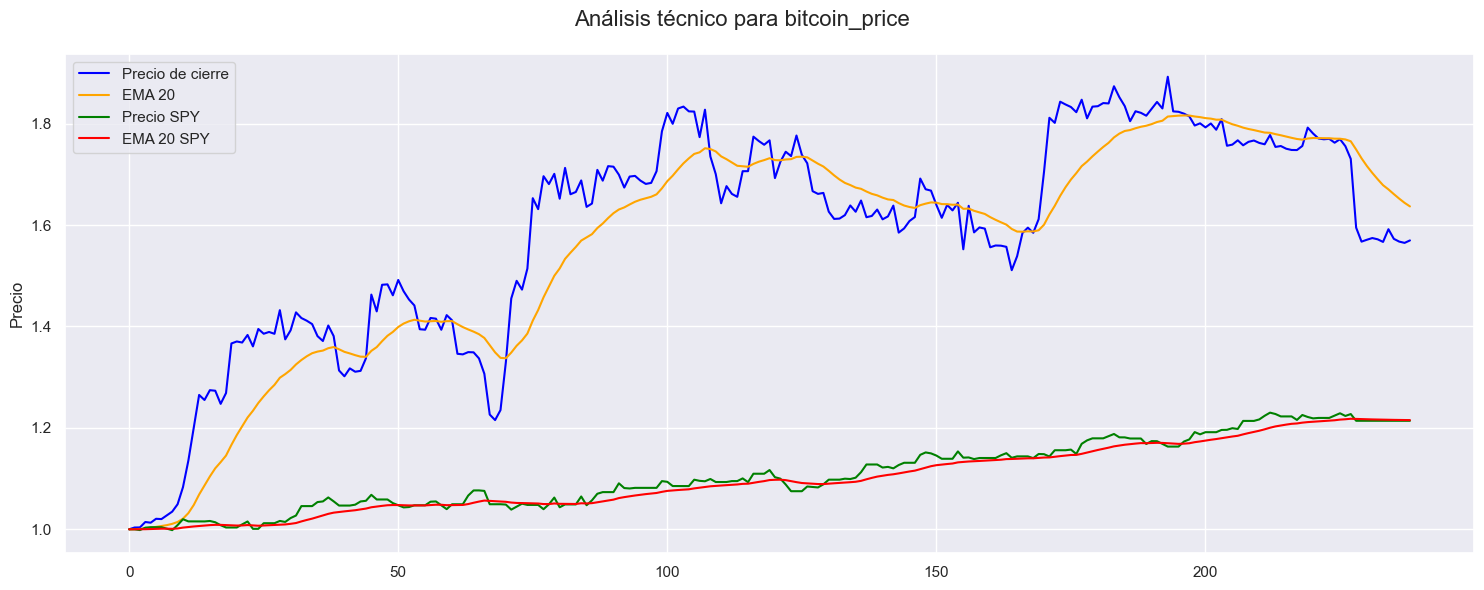

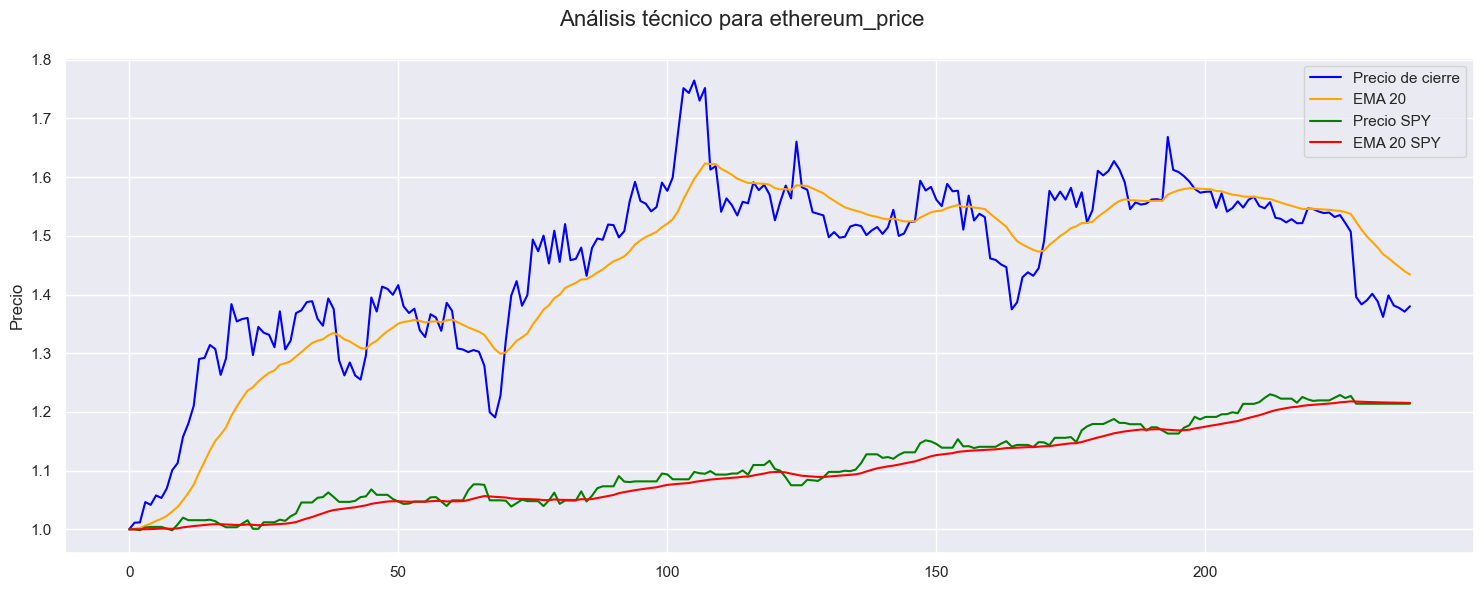

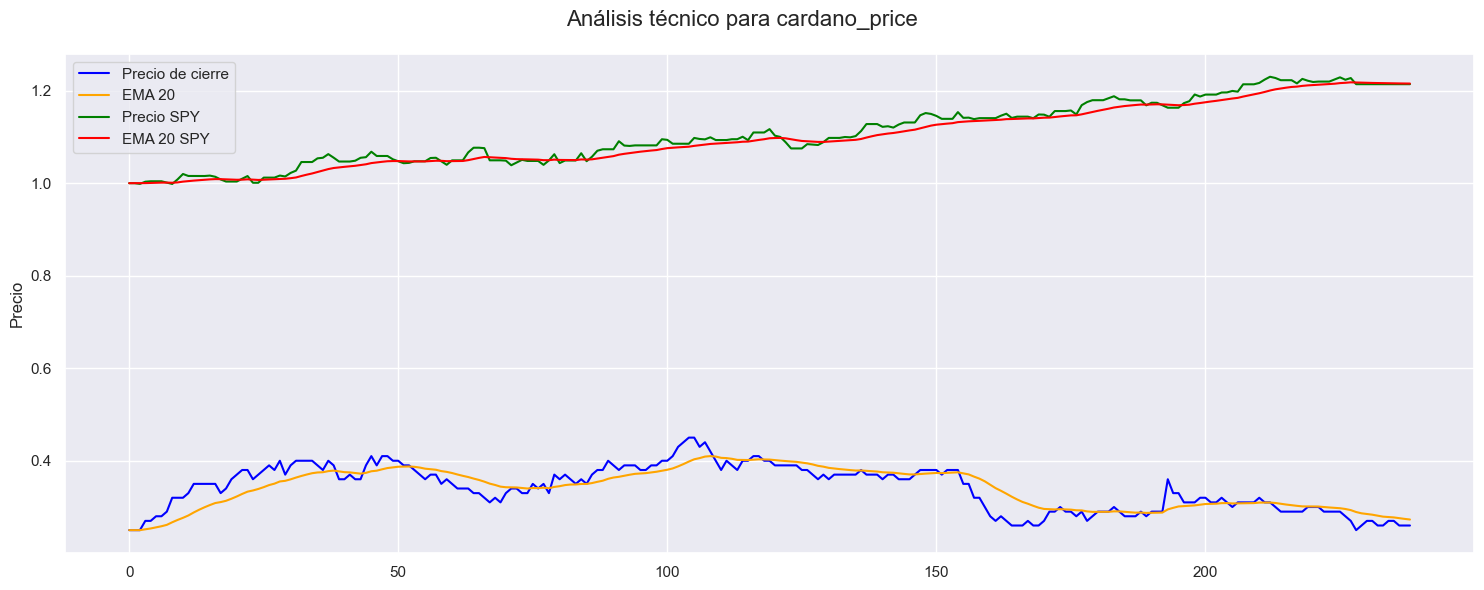

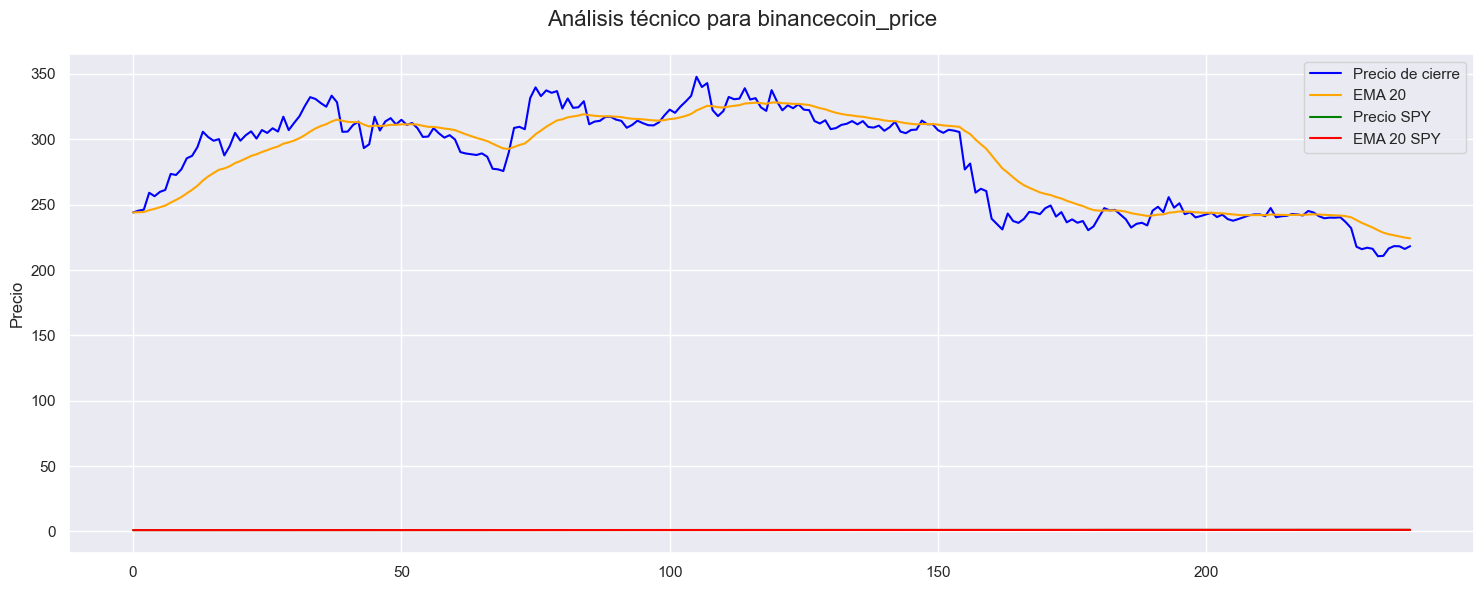

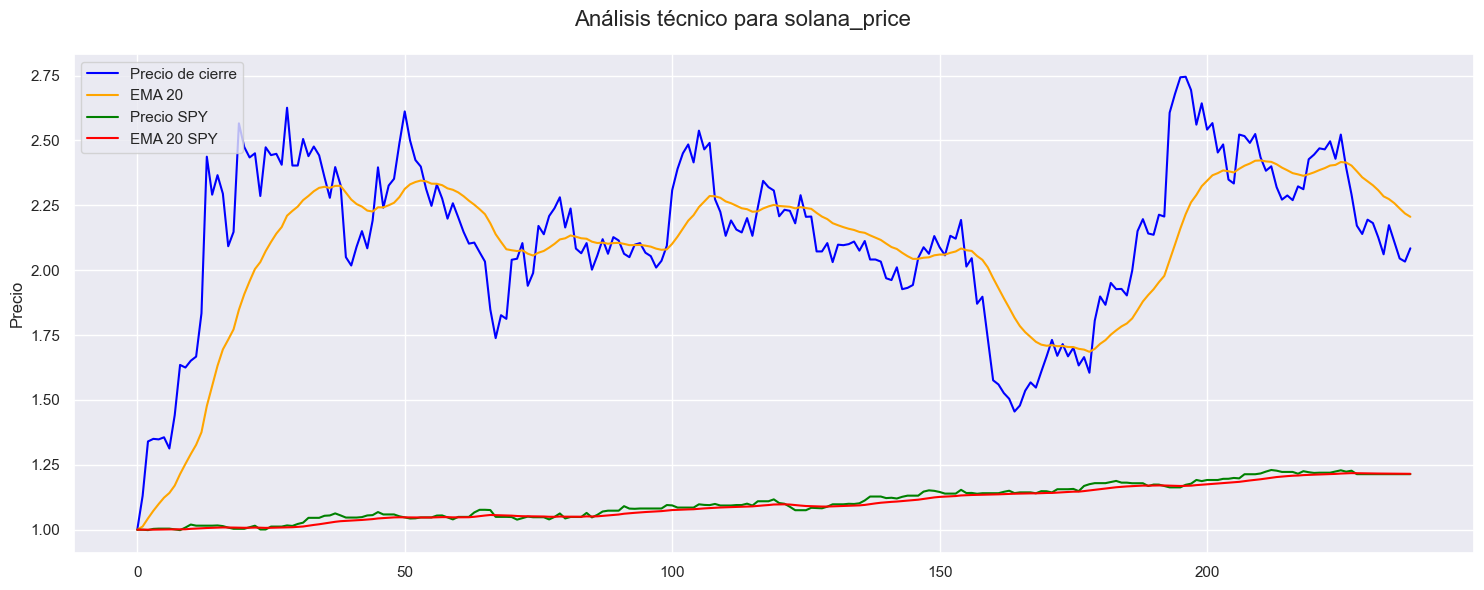

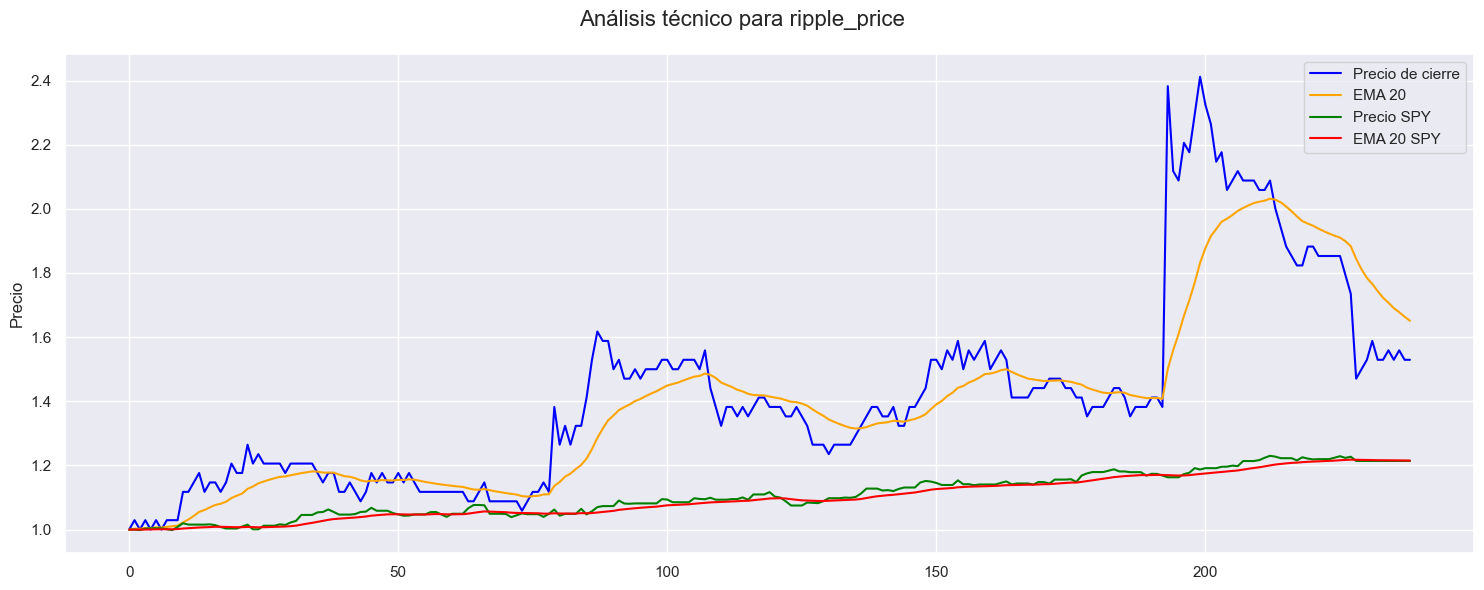

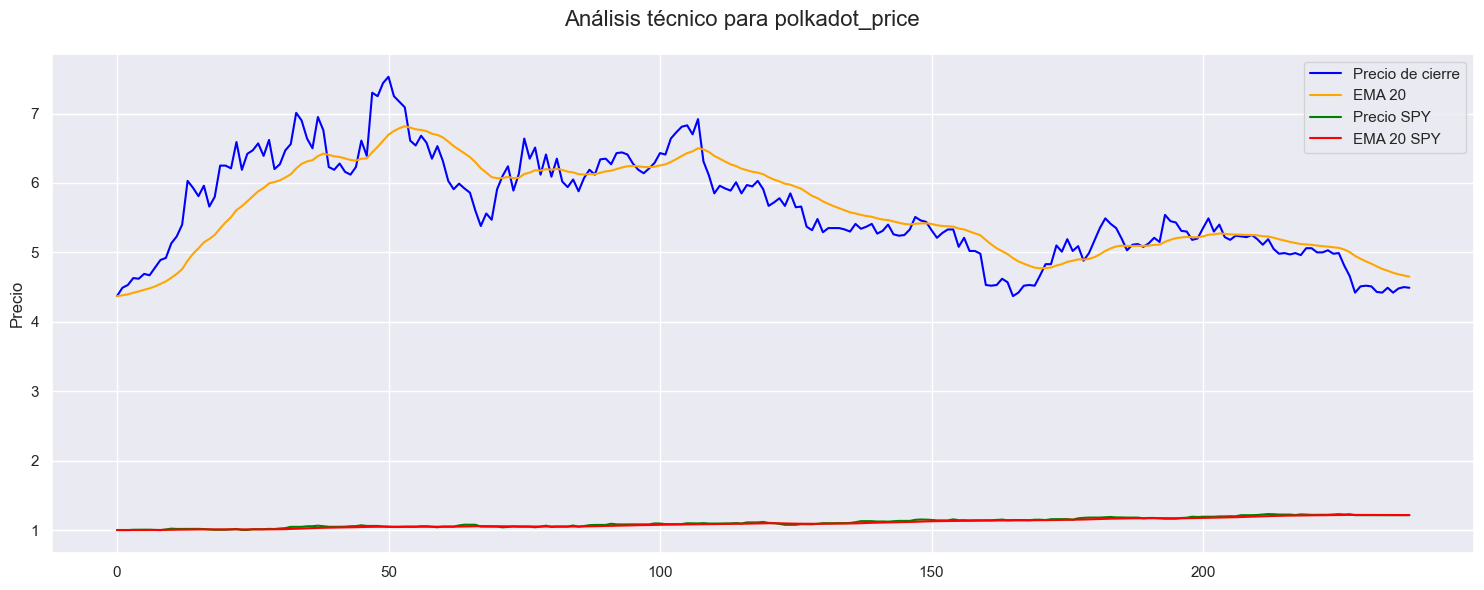

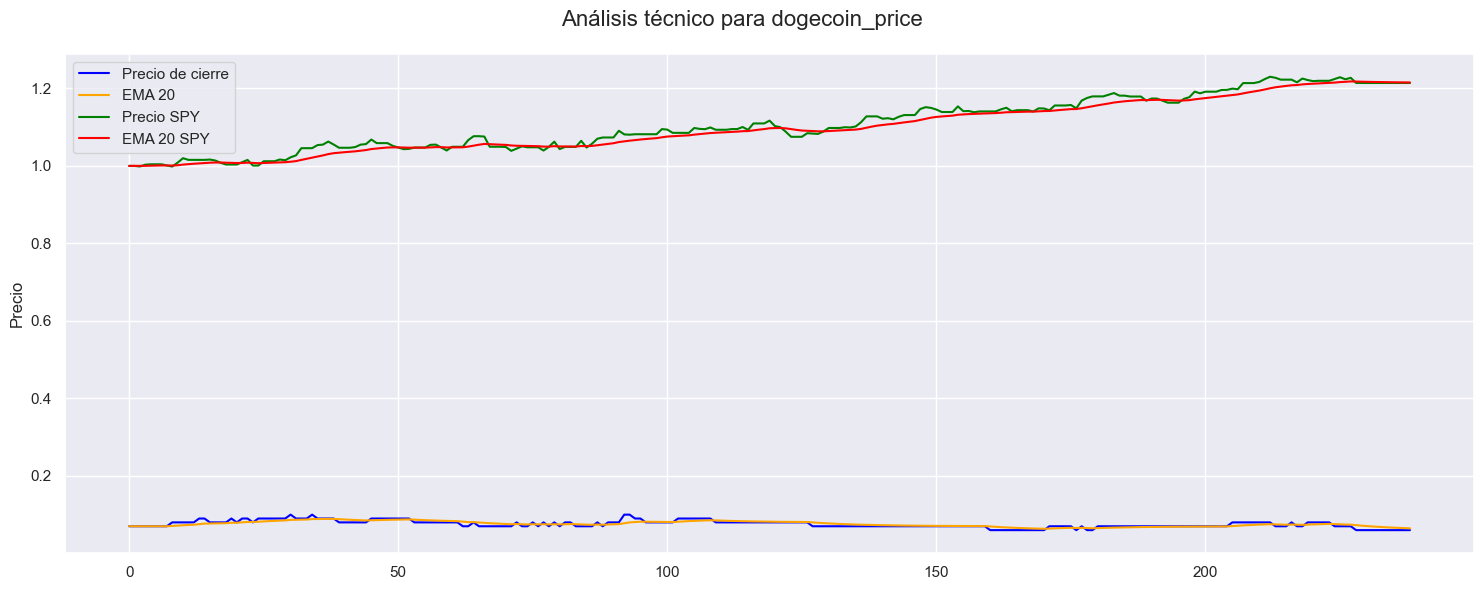

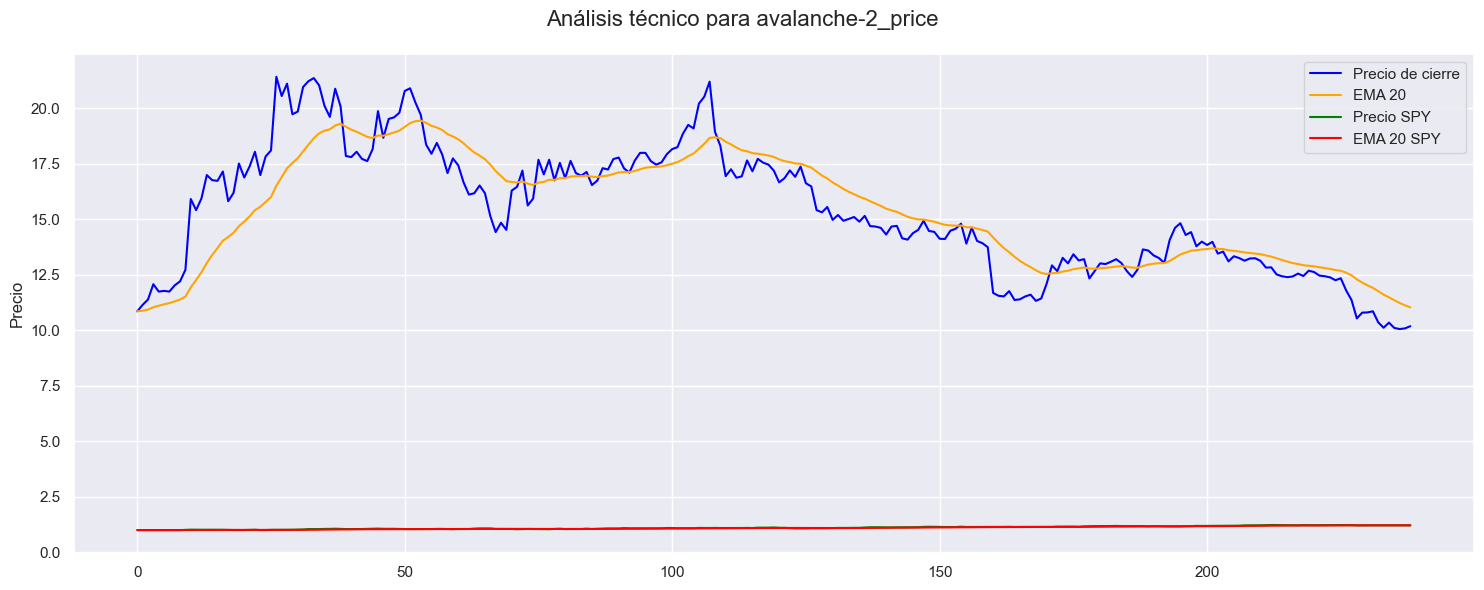

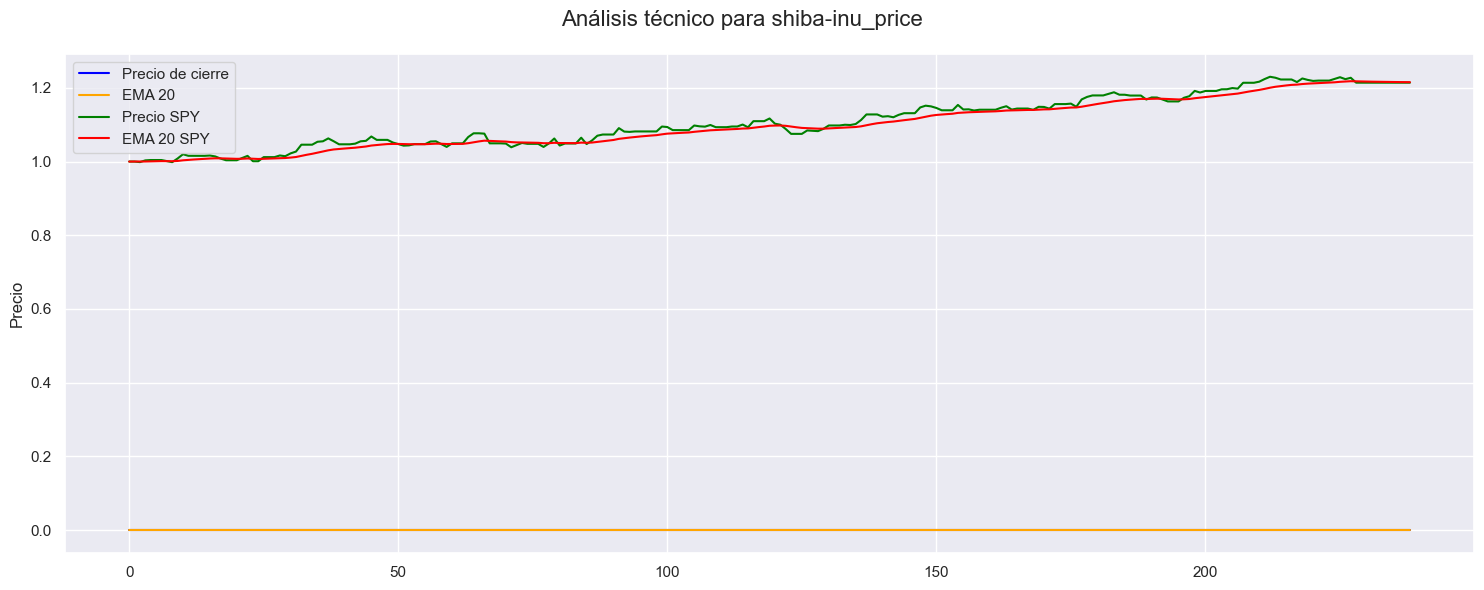

In [154]:
#
import matplotlib.pyplot as plt
import ta

# Calcular las Medias Móviles Exponenciales (EMA)
for column in crypto_columns:
    combined_prices_spy_df[f'{column}_EMA20'] = combined_prices_spy_df[column].ewm(span=20, adjust=False).mean()

# Calcular las Medias Móviles Exponenciales (EMA) para SPY
combined_prices_spy_df['spy_EMA20'] = combined_prices_spy_df['spy_price'].ewm(span=20, adjust=False).mean()

# Graficar los datos para criptomonedas y SPY
for column in crypto_columns:
    fig, axes = plt.subplots(nrows=1, figsize=(15, 6))
    fig.suptitle(f'Análisis técnico para {column}', fontsize=16)

    axes.plot(combined_prices_spy_df[column], label='Precio de cierre', color='blue')
    axes.plot(combined_prices_spy_df[f'{column}_EMA20'], label='EMA 20', color='orange')
    axes.plot(combined_prices_spy_df['spy_price'], label='Precio SPY', color='green')  # Agregar SPY
    axes.plot(combined_prices_spy_df['spy_EMA20'], label='EMA 20 SPY', color='red')  # Agregar EMA SPY
    axes.set_ylabel('Precio')
    axes.legend()

    plt.tight_layout()
    plt.show()


La EMA20 (Exponential Moving Average 20) calcula la media móvil exponencial de los últimos 20 días. otorgando mayor peso a los datos más recientes y reduciendo gradualmente el peso de los datos más antiguos. Se utiliza comúnmente en el análisis técnico para evaluar la dirección de la tendencia y los posibles puntos de inversión.
Si EMA 20 Por Encima del Precio de Cierre: Si el EMA 20 está por encima del precio de cierre, puede indicar una tendencia alcista o positiva. Puede see como una señal de compra.
Si EMA 20 Por Debajo del Precio de Cierre: Si el EMA 20 está por debajo del precio de cierre, puede indicar una tendencia bajista o negativa. Puede interpretarse como una señal de venta.
Asimismo, se tiene en cuencaa que  un "cruce alcista" ocurre cuando el EMA cruza por encima del precio de cierre, lo que puede indicar un cambio potencial hacia una tendencia alcista. Un "cruce bajista" ocurre cuando el EMA cruza por debajo del precio de cierre, sugiriendo un cambio potencial hacia una tendencia bajista.
Por lo expuesto, tomamos el EM20 del pecio de Solana, y detectamos que al estar por arriba la de margen de suba, y por lo tanto podría  haber margen de compra en futuro cercano, con una curva final que queda tirando a plana, distinto de Bitcoin y Ripple, que tambien  tienen margen de suba por el EMA20 pero ya la curva está claramente bajando, en comparación con el EMA20 de Solana. Ethereum sigue patron muy similar a Bitcoin.


KPI3. Otro de los indicadores de desempeño que vamos a tomar en cuenta es el "The Fear and Greed Index in Investing", indicador popular de sentimiento en Bitcoin, pero se tiene en cuenta para otraa criptomonedas también debido a que Bitcoin domina el espacio de las criptomonedas (tiene una dominancia de mercado de 46.5% ) y de algua forma ditamina el comportamiento de otras criptomonedas. Hoy este indicador se encuentra en la etapa de "fear, con 39 puntos", esto es, viene de haber estado más bajo, con mayor miedo a invertir mayor a hoy, cuando ese miedo es menor, y por lo que se ve hay un magen para seguir invirtiendo cuando hay miedo, y esperar, hasta que se vaya el miedo del inversor y todo el mundo este comprando -mayor codicia-, y sea la hora de, precisamente, salir en lo más alto.
Este miedo o codicia está intimamente relacionado con las noticias que vienen del mundo cripto, si hay más regulación o on en EEUU Europa o china, por ejemplo, y si la FED va a subir o no la tasa de interés. 
Por otro lado en nuestro análisis arriba observamos que Bitocoin Ethereum estaban altamente correlacionadas en los precios.
Solana en canbio, no tiene tanta relación con Bitcoiy y ehereum, pero puede argumentarse que a medida que disminuye el miedo al bitcoin, da lugar para invertir en criptomonedas alternativas y aquí Solana aparece como la favorita, por precio actual y proyecciones.
Otro dato a destacar de este indicador del es que sería más relevante para el corto plazo, y nosotros precisamente queremos armar una cartera de nversión en el corto plazo para decidir si destinar un 25% en criptomonedas y aprovechar la eventual suba de lo que queda del 2023, para un inversor de riesgo intermedio.

#Tomamos de la API de alternative.me el indicador popular de sentimiento de compra de criptomonedas. Podemos traer solo la foto del grafico implicito, pero preferimos traer el historico de 2023 para saber como viene el sentimiento de compra con las criptomonedas. SE ve un electrocardiograma y la volatilidad implicita en el humor de compra y venta de criptomonedas pero el indicador va en ascenso pautalino. Este indicador sugiere que hay margen para seguir comprando criptomonedas, hasta que el humor sature y nuevamente haya un sentimiento negativo.



¿Porqué incluimos este indicador? El comportamiento del mercado de criptomonedas es muy emotivo. La gente tiende a volverse codiciosa cuando el mercado sube, lo que resulta en FOMO (miedo a perderse algo). Además, la gente suele vender sus monedas como reacción irracional al ver números rojos. Con nuestro Índice de Miedo y Avaricia, intentamos salvarlo de sus propias reacciones emocionales exageradas. 
Hay dos suposiciones simples:
El miedo extremo puede ser una señal de que los inversores están demasiado preocupados. Esa podría ser una oportunidad de compra.
Cuando los inversores se vuelven demasiado codiciosos, eso significa que el mercado debe sufrir una corrección.
Por lo tanto, analizamos el sentimiento actual del mercado de Bitcoin y calculamos los números en un simple medidor de 0 a 100. Cero significa "miedo extremo", mientras que 100 significa "codicia extrema". 
Fuentes de datos. Alternative.me recopilan datos de las cinco fuentes siguientes:
En primer lugar, el índice actual es solo para bitcoin (pronto se ofrecerán índices separados para monedas alternativas grandes)
Volatilidad (25 %)
Mide la volatilidad actual y el máximo. reducciones de bitcoin y compararlo con los valores promedio correspondientes de los últimos 30 días y 90 días. Sostenemos que un aumento inusual de la volatilidad es señal de un mercado temeroso.
Momento/volumen del mercado (25%)
Mide el volumen actual y el impulso del mercado (nuevamente en comparación con los valores promedio de los últimos 30/90 días) y juntando esos dos valores. Generalmente, cuando vemos altos volúmenes de compra en un mercado positivo a diario, concluimos que el mercado actúa demasiado codicioso/demasiado alcista.
Redes sociales (15%)
Contiene análisis de basado en Twitter y pronto inciporará Reddit. Se recopilan y contabilizan  publicaciones sobre varios hashtags para cada moneda (públicamente, se muestra aún solo los de Bitcoin) y se comprueba qué tan rápido y cuántas interacciones reciben en ciertos períodos de tiempo). Una tasa de interacción inusualmente alta da como resultado un creciente interés público en la moneda y a los ojos de alternative.me corresponde a un comportamiento de mercado codicioso.
Encuestas(15%) - actualmente en desuso, suspendiddas las encuestas.
Dominio (10%)
El dominio de una moneda se asemeja a la cuota de capitalización de mercado de todo el mercado criptográfico. Especialmente en el caso de Bitcoin, creemos que un aumento en el dominio de Bitcoin se debe al miedo (y por lo tanto a una reducción de) inversiones demasiado especulativas en monedas alternativas, ya que Bitcoin se está convirtiendo cada vez más en el refugio seguro de las criptomonedas. 
Por otro lado, cuando el dominio de Bitcoin se reduce, la gente se vuelve más codiciosa al invertir en monedas alternativas más riesgosas, soñando con su oportunidad en la próxima gran corrida alcista. 
Tendencias (10%)
Extraen datos de Google Trends para varias consultas de búsqueda relacionadas con Bitcoin y procesamos esos números, especialmente el cambio en los volúmenes de búsqueda, así como otras búsquedas recomendadas actualmente populares.

Error converting to float: could not convert string to float: ''
Problematic line: 	"name": "Fear and Greed Index",
Skipping line due to missing values: 	"data": [
Error converting to float: could not convert string to float: 'fng_classification'
Problematic line: fng_value,fng_classification,date
Error converting to float: could not convert string to float: ''
Problematic line: 	],
Skipping line due to missing values: 	"metadata": {
Skipping line due to missing values: 		"error": null
Skipping line due to missing values: 	}
Skipping line due to missing values: }


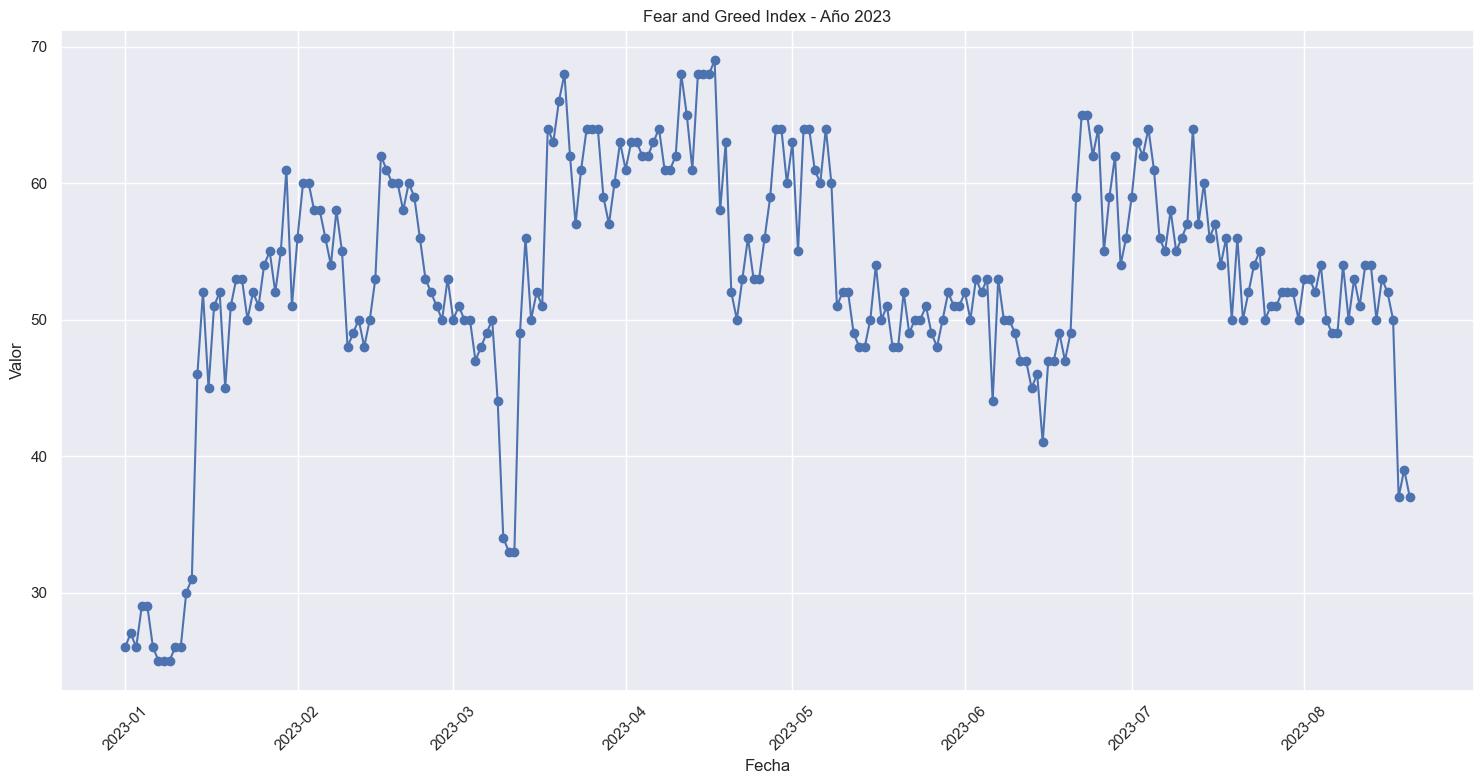

In [160]:
#Tomamos de la API de alternative.me el indicador popular de sentimiento de compra de criptomonedas.
#import requests
#import pandas as pd
#import matplotlib.pyplot as plt

start_date = "2023-01-01"
end_date = "2023-08-20"

url = f"https://api.alternative.me/fng/?limit=1000&format=csv&date_format=us&from={start_date}&to={end_date}"
response = requests.get(url)

if response.status_code == 200:
    data_lines = response.content.decode('utf-8').split('\n')[1:]
    
    data_list = []
    for line in data_lines:
        if line.strip():
            values = line.split(',')
            try:
                if len(values) >= 2:
                    data_dict = {
                        'time': values[0],
                        'value': float(values[1])
                    }
                    data_list.append(data_dict)
                else:
                    print("Skipping line due to missing values:", line)
            except ValueError as e:
                print(f"Error converting to float: {e}")
                print(f"Problematic line: {line}")
    
    df = pd.DataFrame(data_list)
    
    # Convertir 'time' a tipo fecha
    df['time'] = pd.to_datetime(df['time'])
    
    # Filtrar solo los datos de 2023
    df_2023 = df[(df['time'] >= '2023-01-01') & (df['time'] <= '2023-08-20')]
    
    # Graficar los datos
    plt.figure(figsize=(15, 8))
    plt.plot(df_2023['time'], df_2023['value'], marker='o', linestyle='-', color='b')
    plt.title('Fear and Greed Index - Año 2023')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Error al obtener los datos:", response.status_code)


In [138]:
df_FGI.head(10)

time  value
0  08-28-2023   39.0
1  08-27-2023   38.0
2  08-26-2023   38.0
3  08-25-2023   39.0
4  08-24-2023   41.0
5  08-23-2023   37.0
6  08-22-2023   37.0
7  08-21-2023   38.0
8  08-20-2023   37.0
9  08-19-2023   39.0

In [142]:
#from IPython.display import Image

# Proporciona la URL de la imagen
image_url = "https://alternative.me/crypto/fear-and-greed-index.png"

# Muestra la imagen con un ancho específico
Image(url=image_url, width=1200)  # Cambia el valor de '800' según tus preferencias


In [162]:
#from IPython.display import Image
#import requests
#from PIL import Image as PILImage
#from io import BytesIO

# Proporciona la URL de la imagen
image_url = "https://alternative.me/crypto/fear-and-greed-index.png"

# Obtén la imagen desde la URL
response = requests.get(image_url)
image_content = BytesIO(response.content)

# Abre la imagen con PIL
pil_image = PILImage.open(image_content)

# Define la ruta donde guardar la imagen
ruta_guardado = "imagen_FYG.bitcoin.png"

# Guarda la imagen en la ruta especificada
pil_image.save(ruta_guardado)

print("Imagen guardada exitosamente:", ruta_guardado)


Imagen guardada exitosamente: imagen_FYG.bitcoin.png


En base a nuestro analisis de precios y fuentes alterativas de consulta, Bitcoinwisdon.com, decidimos hacer el indicador "MACD" (Moving Average Convergence Divergence) para solana y el RSI (Relative Strength Index), uno analia tendencia y el segundo, capacidad de recuperasción de la moneda. Para simplificar el análisis tomamos sólo los precios diarios de la moneda. 
El cruce de la línea MACD y la línea de señal, así como la relación entre la línea MACD y la línea cero, se utilizan para identificar tendencias alcistas y bajistas, así como posibles divergencias entre el indicador y el precio del activo.
En tanto ee RSI es un oscilador que mide la velocidad y el cambio de los movimientos de precio. Se calcula en función de la relación entre los incrementos de precio y las disminuciones de precio en un período de tiempo específico. 
El RSI oscila entre 0 y 100 y generalmente se muestra como una línea en un gráfico.
- Un RSI por encima de 70 generalmente indica que el activo está sobrecomprado, lo que podría sugerir una posible reversión a la baja.
- Un RSI por debajo de 30 generalmente indica que el activo está sobrevendido, lo que podría sugerir una posible reversión al alza.

En el caso puntual de Solana (SOL) se analizó con estos indicadores expuesto arriba:
Tendencia: todos los marcos de tiempo para la moneda continuaron con una tendencia a la baja (corto, mediano y largo plazo) durante más tiempo.
La línea MACD suele mantenerse por encima de la línea de señal MACD (alcista), aunque con altas y bajas, mientras que el RSU se ubica por encma de 30 y el impulso es fuerte.
Hacia el final  de agosto se observa un cruce Bajista (Bearish Cross), que ocurre cuando el MACD cruza hacia abajo la línea de señal, si bien e una señal de que el impulso bajista está ganando fuerza, lo vems como que puede ser una oportunidad para considerar posiciones cortas (venta).

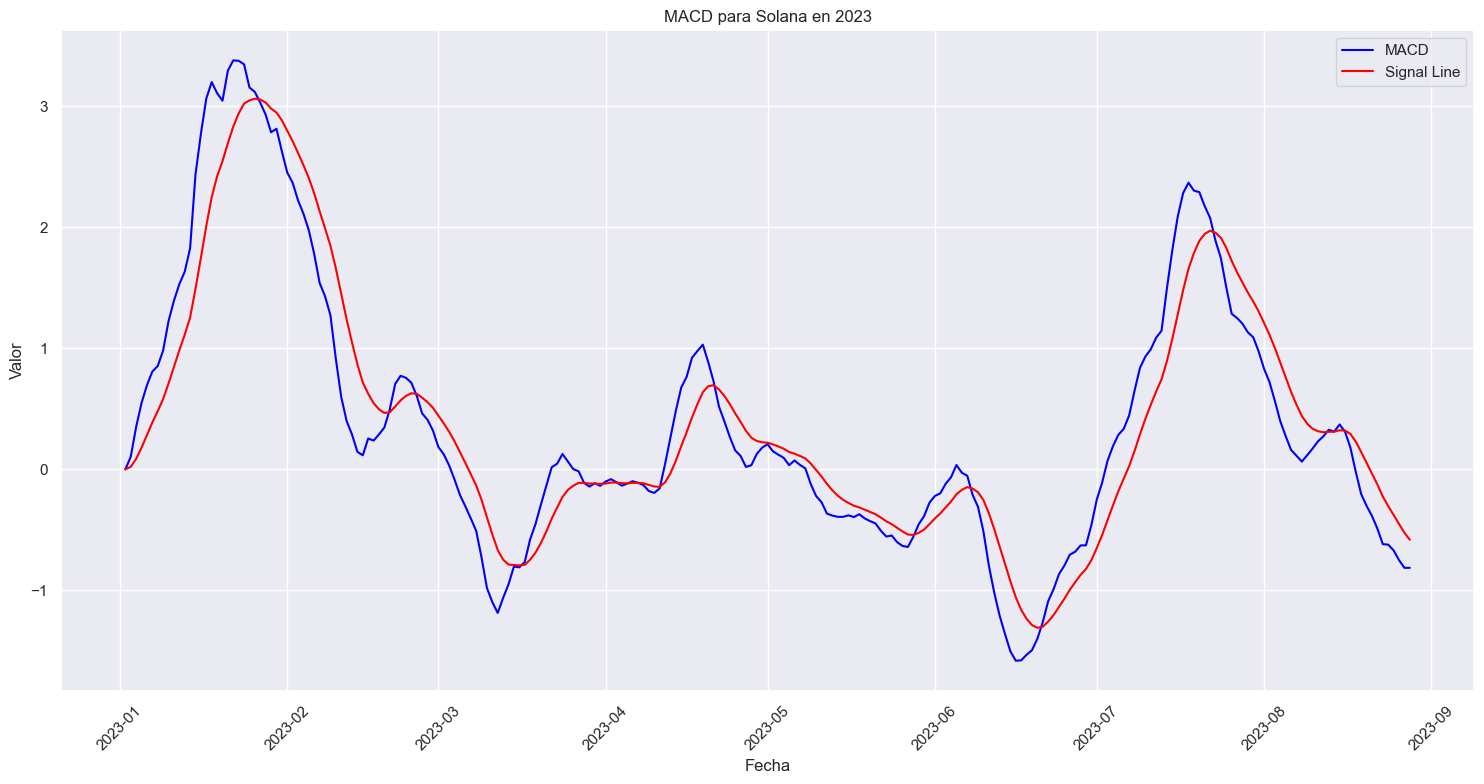

In [166]:
#Buscamos MACD

# Calcular el EMA de 12 días (short-term EMA)
combined_prices_df['EMA12'] = combined_prices_df['solana_price'].ewm(span=12, adjust=False).mean()

# Calcular el EMA de 26 días (long-term EMA)
combined_prices_df['EMA26'] = combined_prices_df['solana_price'].ewm(span=26, adjust=False).mean()

# Calcular la línea MACD (diferencia entre EMA12 y EMA26)
combined_prices_df['MACD'] = combined_prices_df['EMA12'] - combined_prices_df['EMA26']

# Calcular la línea de señal (EMA9 del MACD)
combined_prices_df['Signal Line'] = combined_prices_df['MACD'].ewm(span=9, adjust=False).mean()

# Graficar el MACD y la línea de señal
plt.figure(figsize=(15, 8))
plt.plot(combined_prices_df['date'], combined_prices_df['MACD'], label='MACD', color='blue')
plt.plot(combined_prices_df['date'], combined_prices_df['Signal Line'], label='Signal Line', color='red')
plt.title('MACD para Solana en 2023')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\maral\AppData\Local\Temp\ipykernel_21736\430762223.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_prices_df['Positive Change'] = combined_prices_df['Price Change'].apply(lambda x: x if x > 0 else 0)
C:\Users\maral\AppData\Local\Temp\ipykernel_21736\430762223.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_prices_df['Negative Change'] = combined_prices_df['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)
C:\Users\maral\AppData\Local\Temp\ipykernel_21736\430762223.p

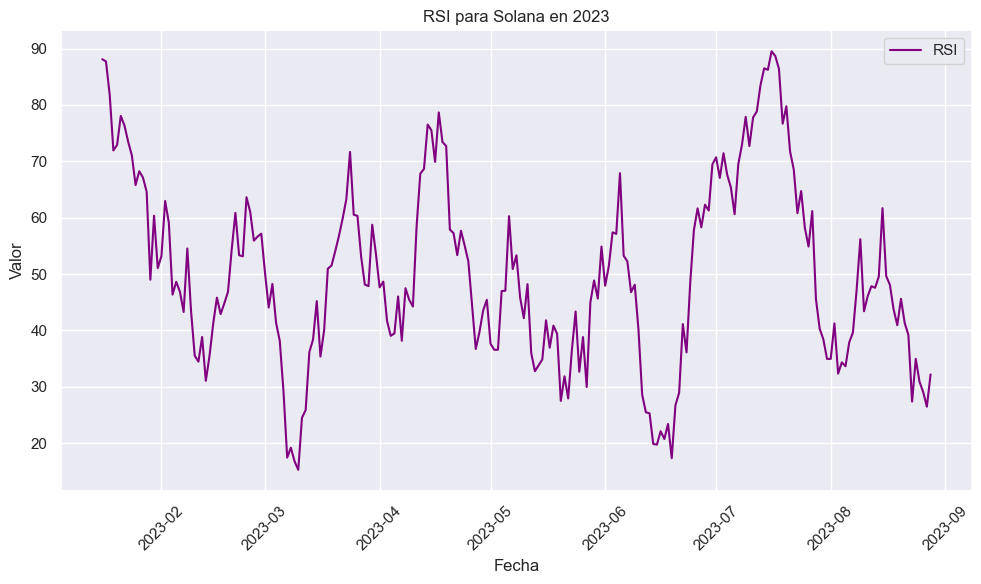

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que combined_prices_df es tu DataFrame con los precios diarios de cierre de Solana

# Calcula el cambio de precio entre días
combined_prices_df['Price Change'] = combined_prices_df['solana_price'].diff()

# Elimina el primer valor NaN
combined_prices_df = combined_prices_df.dropna()

# Calcula los valores positivos y negativos de los cambios de precio
combined_prices_df['Positive Change'] = combined_prices_df['Price Change'].apply(lambda x: x if x > 0 else 0)
combined_prices_df['Negative Change'] = combined_prices_df['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)

# Calcula el promedio de los cambios positivos y negativos en un período de tiempo (por ejemplo, 14 días)
period = 14
combined_prices_df['Avg Positive Change'] = combined_prices_df['Positive Change'].rolling(window=period).mean()
combined_prices_df['Avg Negative Change'] = combined_prices_df['Negative Change'].rolling(window=period).mean()

# Calcula el RSI utilizando la fórmula del indicador
combined_prices_df['RSI'] = 100 - (100 / (1 + (combined_prices_df['Avg Positive Change'] / combined_prices_df['Avg Negative Change'])))

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(combined_prices_df['date'], combined_prices_df['RSI'], label='RSI', color='purple')
plt.title('RSI para Solana en 2023')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Recursos adicionales. Extraemos otra base de tados de CoinGecko para enriqueceer el análisis y tener datos del mercado global de criptomonedas

In [150]:


url = "https://api.coingecko.com/api/v3/global"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # Crear un DataFrame a partir de los datos
    df_global = pd.DataFrame([data["data"]])
    
    # Imprime los datos globales
    print("Datos Globales:")
    print("Total de criptomonedas:", data["data"]["active_cryptocurrencies"])
    print("Total de mercados:", data["data"]["markets"])
    print("BTC Dominancia:", data["data"]["market_cap_percentage"]["btc"], "%")
    print("Volumen total 24h:", data["data"]["total_volume"]["usd"], "USD")
    print("Capitalización total de todas las criptomonedas listadas:", data["data"]["total_market_cap"]["usd"], "USD")
else:
    print("Error al obtener los datos. Código de estado:", response.status_code)


Datos Globales:
Total de criptomonedas: 10198
Total de mercados: 840
BTC Dominancia: 46.45643801658229 %
Volumen total 24h: 27197875371.205563 USD
Capitalización total de todas las criptomonedas listadas: 1094547799994.3325 USD


In [ ]:
df_global.head()

active_cryptocurrencies  upcoming_icos  ongoing_icos  ended_icos  markets  \
0                    10107              0            49        3376      821   

                                    total_market_cap  \
0  {'btc': 41843878.33342539, 'eth': 655915808.72...   

                                        total_volume  \
0  {'btc': 4579722.174500105, 'eth': 71788569.641...   

                               market_cap_percentage  \
0  {'btc': 46.50856415585726, 'eth': 18.297655339...   

   market_cap_change_percentage_24h_usd  updated_at  
0                             -6.313858  1692364618

In [151]:
# Exporta el DataFrame de datos globales a un archivo CSV
df_global.to_csv('df_global.csv', index=False)

AQuí vemos el peso de los exchanges en la comercialización de la criptomoneda

In [ ]:
url = "https://api.coingecko.com/api/v3/exchanges"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # Crear un DataFrame a partir de los datos
    df_exchanges = pd.DataFrame(data)
    print(df_exchanges)
else:
    print("Error en la solicitud a la API")


                      id                  name  year_established  \
0                binance               Binance            2017.0   
1                   gdax     Coinbase Exchange            2012.0   
2             bybit_spot                 Bybit            2018.0   
3                  huobi                 Huobi            2013.0   
4                 kraken                Kraken            2011.0   
..                   ...                   ...               ...   
95             sushiswap             Sushiswap            2020.0   
96                pulsex                PulseX               NaN   
97  velodrome-finance-v2  Velodrome Finance v2               NaN   
98                biswap                Biswap               NaN   
99         dodo_arbitrum       DODO (Arbitrum)               NaN   

                   country                                        description  \
0           Cayman Islands                                                      
1            United S

In [ ]:
df_exchanges.head(10)

id               name  year_established                 country  \
0     binance            Binance            2017.0          Cayman Islands   
1        gdax  Coinbase Exchange            2012.0           United States   
2  bybit_spot              Bybit            2018.0  British Virgin Islands   
3       huobi              Huobi            2013.0              Seychelles   
4      kraken             Kraken            2011.0           United States   
5      kucoin             KuCoin            2014.0              Seychelles   
6  binance_us         Binance US            2019.0           United States   
7        okex                OKX            2017.0              Seychelles   
8        gate            Gate.io               NaN          Cayman Islands   
9      bitget             Bitget            2018.0              Seychelles   

                                         description  \
0                                                      
1                                                      
2  Bybit is a cryptocurrency exchange that offers...   
3                                                      
4                                                      
5                                                      
6                                                      
7                                                      
8  Gate was established in 2013, and it is the to...   
9                                                      

                                           url  \
0                     https://www.binance.com/   
1   https://coinbase-consumer.sjv.io/coingecko   
2                        https://www.bybit.com   
3                        https://www.huobi.com   
4  https://r.kraken.com/c/2223866/687155/10583   
5                      https://www.kucoin.com/   
6                      https://www.binance.us/   
7                          https://www.okx.com   
8                             https://gate.io/   
9     https://www.bitget.com/referral/register   

                                               image has_trading_incentive  \
0  https://assets.coingecko.com/markets/images/52...                 False   
1  https://assets.coingecko.com/markets/images/23...                 False   
2  https://assets.coingecko.com/markets/images/69...                 False   
3  https://assets.coingecko.com/markets/images/25...                 False   
4  https://assets.coingecko.com/markets/images/29...                 False   
5  https://assets.coingecko.com/markets/images/61...                 False   
6  https://assets.coingecko.com/markets/images/46...                 False   
7  https://assets.coingecko.com/markets/images/96...                 False   
8  https://assets.coingecko.com/markets/images/60...                 False   
9  https://assets.coingecko.com/markets/images/54...                 False   

   trust_score  trust_score_rank  trade_volume_24h_btc  \
0           10                 1         575352.443815   
1           10                 2          87402.477325   
2           10                 3          82633.897515   
3           10                 4          42514.432981   
4           10                 5          41646.917904   
5           10                 6          31708.229746   
6           10                 7            941.128779   
7            9                 8         115903.834007   
8            9                 9          68167.193572   
9            9                10          28368.036749   

   trade_volume_24h_btc_normalized  
0                    426265.081525  
1                     87402.477325  
2                     82633.897515  
3                     42514.432981  
4                     41646.917904  
5                     31708.229746  
6                       941.128779  
7                    114659.592286  
8                     68167.193572  
9                     28368.036749

FIN EDA